In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
from crea_visualizza_istanza import *
from controlli_ammissibilita import *
from greedy import *
from local_search import *
from greedy_rand import *
from grasp import *
from tabu_search import *
from iterated_local_search import *
from visualizza_grafici import *
from clark_wright import *
import os



In [28]:


## Istanza 

delta_small = 1.5
G_small, residui_dict_small = generate_instance(num_bambini=200, pos_min=20, pos_max=50, seed=3, delta= delta_small)
#plot_graph(G_small, 'grafo_dim_ridotte.png')
img = 'images/small/'
os.makedirs(img, exist_ok=True)


#Stampo i nodi e le relative posizioni
for node, data in G_small.nodes(data=True):
    print(f"Nodo: {node}, Posizione: {data['pos']}, Massima Distanza: {data['max_distance']}")

#print("\n")

#Stampo gli archi e i relativi pesi
#for u, v, data in G_small.edges(data=True):
#    print(f"Arco: {u} - {v}, Peso: {data['weight']}")

subsequentNN = []
schoolNN = []
ls_best = []
ls_first = []
ls_subsequentNN = []
ls_schoolNN = []
grasp_subsequentNN = []
grasp_schoolNN = []
tabu_subsequentNN = []
tabu_schoolNN = []
Ils_subsequentNN = []
Ils_schoolNN = []
grasp_bI = []
tabu_bI = []
ils_bI = []
grasp_fI = []
tabu_fI = []
ils_fI = []
times_small = []


Nodo: Bambino_1, Posizione: [36.52393708 41.24443468], Massima Distanza: 3.0
Nodo: Bambino_2, Posizione: [28.72714217 35.32482816], Massima Distanza: 13.5
Nodo: Bambino_3, Posizione: [46.78840863 46.88879267], Massima Distanza: 19.5
Nodo: Bambino_4, Posizione: [23.76755931 26.21728634], Massima Distanza: 28.5
Nodo: Bambino_5, Posizione: [21.5440161  33.22429531], Massima Distanza: 24.0
Nodo: Bambino_6, Posizione: [20.89628633 33.70499673], Massima Distanza: 25.5
Nodo: Bambino_7, Posizione: [39.47432143 28.35461848], Massima Distanza: 19.5
Nodo: Bambino_8, Posizione: [40.28764706 37.72588452], Massima Distanza: 9.0
Nodo: Bambino_9, Posizione: [20.71945647 36.76562264], Massima Distanza: 24.0
Nodo: Bambino_10, Posizione: [27.77757341 32.45303591], Massima Distanza: 18.0
Nodo: Bambino_11, Posizione: [28.50575245 40.79413755], Massima Distanza: 12.0
Nodo: Bambino_12, Posizione: [33.21361153 24.70603215], Massima Distanza: 24.0
Nodo: Bambino_13, Posizione: [36.33947054 43.40944294], Massima

# Greedy small

In [29]:



(percorsi_sub_NN, sub_NN_obj_val, residui_dict_small_sub_NN), time = subsequent_nearest_neighbour(G_small, residui_dict_small, delta_small)
stampa_percorsi(percorsi_sub_NN)
print(f"Funzione obiettivo: {sub_NN_obj_val}")
check_solution(percorsi_sub_NN, G_small, delta_small)
subsequentNN.append(sub_NN_obj_val)
times_small.append(time)


Tempo impiegato: 00:00:0.033060
### Visualizzazione dei Percorsi ###

Percorso 1: Scuola - Bambino_1 - Bambino_113 - Bambino_13 - Bambino_134 - Bambino_171
Percorso 2: Scuola - Bambino_104 - Bambino_145 - Bambino_160 - Bambino_178 - Bambino_56 - Bambino_140 - Bambino_28 - Bambino_24 - Bambino_50 - Bambino_96 - Bambino_88 - Bambino_27 - Bambino_102 - Bambino_179
Percorso 3: Scuola - Bambino_121 - Bambino_152 - Bambino_19 - Bambino_43 - Bambino_153 - Bambino_46 - Bambino_37 - Bambino_138 - Bambino_74 - Bambino_95 - Bambino_44 - Bambino_90 - Bambino_77 - Bambino_84 - Bambino_151 - Bambino_167
Percorso 4: Scuola - Bambino_170 - Bambino_30 - Bambino_29 - Bambino_73 - Bambino_52 - Bambino_81
Percorso 5: Scuola - Bambino_188 - Bambino_36 - Bambino_8 - Bambino_163 - Bambino_89 - Bambino_53 - Bambino_100 - Bambino_162 - Bambino_79 - Bambino_119
Percorso 6: Scuola - Bambino_183 - Bambino_31 - Bambino_11 - Bambino_63 - Bambino_51 - Bambino_120 - Bambino_169
Percorso 7: Scuola - Bambino_67 - Bambi

In [30]:

(percorsi_sch_NN, sch_NN_obj_val, residui_dict_small_sch_NN), time = school_nearest_neighbour(G_small, residui_dict_small, delta_small)
#stampa_percorsi(percorsi_sch_NN)
print(f"Funzione obiettivo: {sch_NN_obj_val}")
check_solution(percorsi_sch_NN, G_small, delta_small)
schoolNN.append(sch_NN_obj_val)
times_small.append(time)


Tempo impiegato: 00:00:0.007162
Funzione obiettivo: 2800703
Soluzione ammissibile.


In [31]:

(percorsi_sub_NN_R, sub_NN_R_obj_val, residui_dict_small_sub_NN_R), time = subsequent_nearest_neighbour_randomized(G_small, residui_dict_small, delta_small, k=3)
#stampa_percorsi(percorsi_sub_NN)
print(f"Funzione obiettivo: {sub_NN_R_obj_val}")
check_solution(percorsi_sub_NN_R, G_small, delta_small)
subsequentNN.append(sub_NN_R_obj_val)
times_small.append(time)


Tempo impiegato: 00:00:0.033071
Funzione obiettivo: 3700923
Soluzione ammissibile.


In [32]:

(percorsi_sch_NN_R, sch_NN_R_obj_val, residui_dict_small_sch_NN_R), time = school_nearest_neighbour_randomized(G_small, residui_dict_small, delta_small, k=3)
#stampa_percorsi(percorsi_sch_NN_R)
print(f"Funzione obiettivo: {sch_NN_R_obj_val}")
check_solution(percorsi_sch_NN_R, G_small, delta_small)
schoolNN.append(sch_NN_R_obj_val)
times_small.append(time)



Tempo impiegato: 00:00:0.078397
Funzione obiettivo: 3300833
Soluzione ammissibile.


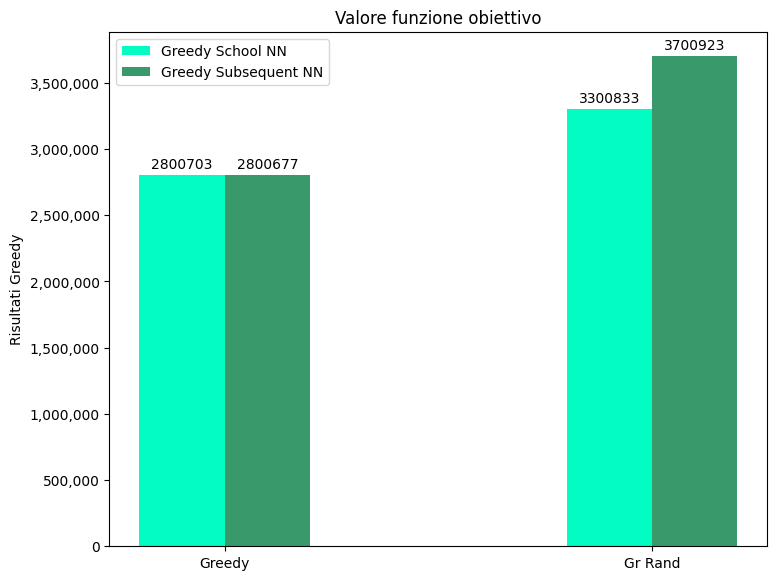

In [33]:
plotSubSchResults(subsequentNN, schoolNN, "Greedy", img + 'greedy_small.png')

In [34]:
#i = prova(G_small, residui_dict_small, delta_small, k=2, num_greedy=1000, ls="local_search_bI", max_len=5)

# Local Search small

In [35]:
(percorsi_ls_bI, ls_bI_obj_val, residui_dict_small_sub_ls_bI), time = local_search_bI(G_small, residui_dict_small_sub_NN, percorsi_sub_NN, sub_NN_obj_val, delta_small, max_len=6)
#stampa_percorsi(percorsi_ls_bI)
print(f"Funzione obiettivo: {ls_bI_obj_val}")
check_solution(percorsi_ls_bI, G_small, delta_small)
ls_subsequentNN.append(ls_bI_obj_val)
ls_best.append(ls_bI_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.241664
Funzione obiettivo: 2800673
Soluzione ammissibile.


In [36]:
(percorsi_ls_bI, ls_bI_obj_val, residui_dict_small_ls_sch_bI), time = local_search_bI(G_small, residui_dict_small_sch_NN, percorsi_sch_NN, sch_NN_obj_val, delta_small, max_len=5)
#stampa_percorsi(percorsi_ls_bI)
print(f"Funzione obiettivo: {ls_bI_obj_val}")
check_solution(percorsi_ls_bI, G_small, delta_small)
ls_schoolNN.append(ls_bI_obj_val)
ls_best.append(ls_bI_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.135631
Funzione obiettivo: 2800697
Soluzione ammissibile.


In [37]:
(percorsi_sub_ls_fI, sub_ls_fI_obj_val, residui_dict_small_sub_ls_fI), time = local_search_fI(G_small, residui_dict_small_sub_NN, percorsi_sub_NN, sub_NN_obj_val, delta_small, max_len=5)
#stampa_percorsi(percorsi_ls_fI)
print(f"Funzione obiettivo: {sub_ls_fI_obj_val}")
check_solution(percorsi_sub_ls_fI, G_small, delta_small)
ls_subsequentNN.append(sub_ls_fI_obj_val)
ls_first.append(sub_ls_fI_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.107621
Funzione obiettivo: 2800673
Soluzione ammissibile.


In [38]:
(percorsi_sch_ls_fI, sch_ls_fI_obj_val, residui_dict_small_sch_ls_fI), time = local_search_fI(G_small, residui_dict_small_sch_NN, percorsi_sch_NN, sch_NN_obj_val, delta_small, max_len=5)
#stampa_percorsi(percorsi_ls_bI)
print(f"Funzione obiettivo: {sch_ls_fI_obj_val}")
check_solution(percorsi_sch_ls_fI, G_small, delta_small)
ls_schoolNN.append(sch_ls_fI_obj_val)
ls_first.append(sch_ls_fI_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.100110
Funzione obiettivo: 2800699
Soluzione ammissibile.


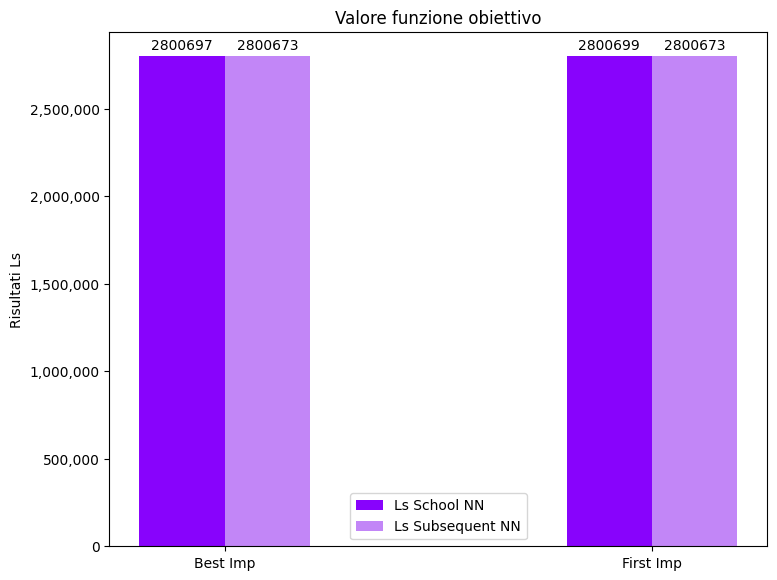

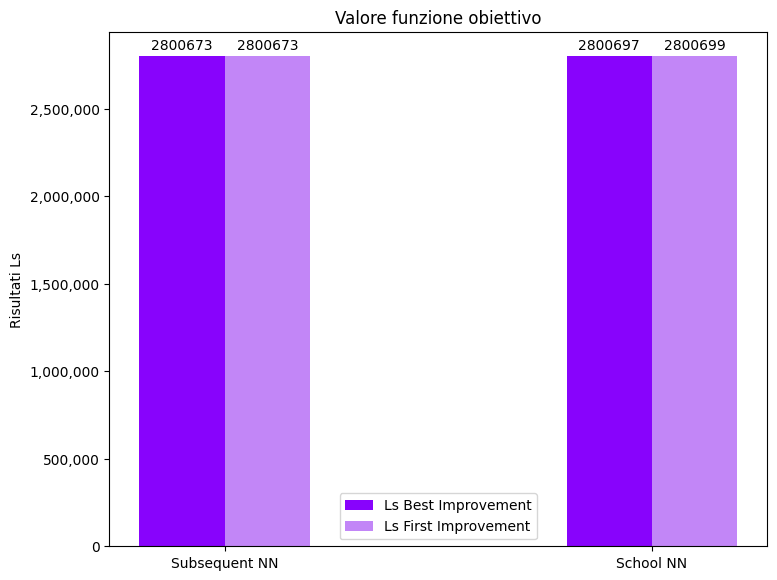

In [39]:

plotSubSchResults(ls_subsequentNN, ls_schoolNN, 'Ls', img + 'ls_small_sub_sch.png')
plotBestFirstResults(ls_best, ls_first, 'Ls', img + 'ls_small_best_first.png')

# Grasp small

1
Tempo impiegato: 00:00:0.032647
Tempo impiegato: 00:00:0.606660
2
Tempo impiegato: 00:00:0.032725
Tempo impiegato: 00:00:0.804361
3
Tempo impiegato: 00:00:0.034251
Tempo impiegato: 00:00:0.773626
4
Tempo impiegato: 00:00:0.034797
Tempo impiegato: 00:00:0.599658
5
Tempo impiegato: 00:00:0.033004
Tempo impiegato: 00:00:0.398977
6
Tempo impiegato: 00:00:0.032749
Tempo impiegato: 00:00:0.648065
7
Tempo impiegato: 00:00:0.032178
Tempo impiegato: 00:00:0.473487
8
Tempo impiegato: 00:00:0.032576
Tempo impiegato: 00:00:0.503732
9
Tempo impiegato: 00:00:0.032941
Tempo impiegato: 00:00:0.850966
10
Tempo impiegato: 00:00:0.033364
Tempo impiegato: 00:00:0.258875
11
Tempo impiegato: 00:00:0.033847
Tempo impiegato: 00:00:0.526302
12
Tempo impiegato: 00:00:0.033374
Tempo impiegato: 00:00:0.421665
13
Tempo impiegato: 00:00:0.033801
Tempo impiegato: 00:00:0.910315
14
Tempo impiegato: 00:00:0.032563
Tempo impiegato: 00:00:1.102573
15
Tempo impiegato: 00:00:0.032780
Tempo impiegato: 00:00:0.718633
16
T

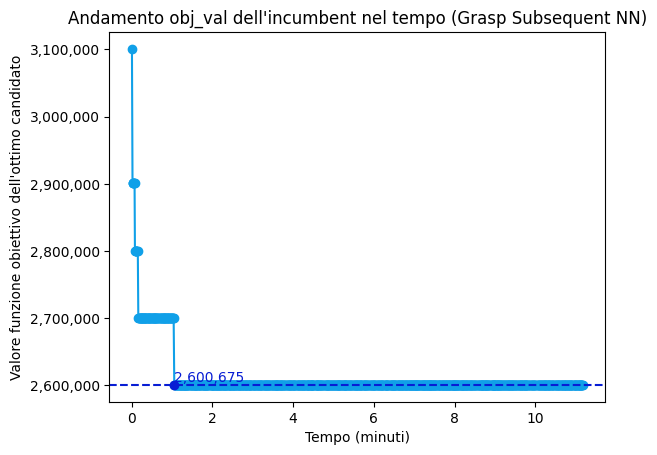

94
Tempo impiegato: 00:11:10.629567
Funzione obiettivo: 2600675
Soluzione ammissibile.


In [40]:

(percorsi_G_sub_NN_bI, G_sub_NN_bI_obj_val, residui_dict_small_G_sub_NN_bI), time = GRASP_subsequent_NN(G_small, residui_dict_small, delta_small, k=2, num_greedy=1000, ls="local_search_bI", max_len=5, img="images/small/grasp_sub_bI_time.png")
#stampa_percorsi(percorsi_G_sub_NN_bI)
print(f"Funzione obiettivo: {G_sub_NN_bI_obj_val}")
check_solution(percorsi_G_sub_NN_bI, G_small, delta_small)
grasp_subsequentNN.append(G_sub_NN_bI_obj_val)
grasp_bI.append(G_sub_NN_bI_obj_val)
times_small.append(time)

1
Tempo impiegato: 00:00:0.037588
Tempo impiegato: 00:00:0.627902
2
Tempo impiegato: 00:00:0.033242
Tempo impiegato: 00:00:0.811072
3
Tempo impiegato: 00:00:0.033572
Tempo impiegato: 00:00:0.702327
4
Tempo impiegato: 00:00:0.033159
Tempo impiegato: 00:00:0.442196
5
Tempo impiegato: 00:00:0.033594
Tempo impiegato: 00:00:0.332946
6
Tempo impiegato: 00:00:0.034543
Tempo impiegato: 00:00:0.572807
7
Tempo impiegato: 00:00:0.033321
Tempo impiegato: 00:00:0.413807
8
Tempo impiegato: 00:00:0.033393
Tempo impiegato: 00:00:0.416010
9
Tempo impiegato: 00:00:0.034794
Tempo impiegato: 00:00:0.599593
10
Tempo impiegato: 00:00:0.033728
Tempo impiegato: 00:00:0.212294
11
Tempo impiegato: 00:00:0.033545
Tempo impiegato: 00:00:0.471466
12
Tempo impiegato: 00:00:0.034220
Tempo impiegato: 00:00:0.374485
13
Tempo impiegato: 00:00:0.033525
Tempo impiegato: 00:00:0.838648
14
Tempo impiegato: 00:00:0.032061
Tempo impiegato: 00:00:0.902681
15
Tempo impiegato: 00:00:0.034064
Tempo impiegato: 00:00:0.568937
16
T

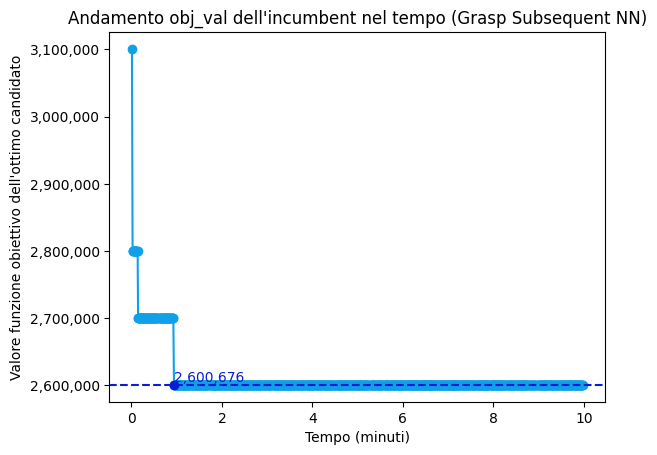

94
Tempo impiegato: 00:09:58.707988
Funzione obiettivo: 2600676
Soluzione ammissibile.


In [41]:
(percorsi_G_sub_NN_fI, G_sub_NN_fI_obj_val, residui_dict_small_G_sub_NN_fI), time = GRASP_subsequent_NN(G_small, residui_dict_small, delta_small, k=2, num_greedy=1000, ls="local_search_fI", max_len=5, img="images/small/grasp_sub_fI_time.png")
#stampa_percorsi(percorsi_G_sub_NN_fI)
print(f"Funzione obiettivo: {G_sub_NN_fI_obj_val}")
check_solution(percorsi_G_sub_NN_fI, G_small, delta_small)
grasp_subsequentNN.append(G_sub_NN_fI_obj_val)
grasp_fI.append(G_sub_NN_fI_obj_val)
times_small.append(time)

1
Tempo impiegato: 00:00:0.009459
Tempo impiegato: 00:00:0.574544
2
Tempo impiegato: 00:00:0.006808
Tempo impiegato: 00:00:0.199491
3
Tempo impiegato: 00:00:0.006415
Tempo impiegato: 00:00:0.378551
4
Tempo impiegato: 00:00:0.006917
Tempo impiegato: 00:00:0.478438
5
Tempo impiegato: 00:00:0.007887
Tempo impiegato: 00:00:0.291756
6
Tempo impiegato: 00:00:0.006814
Tempo impiegato: 00:00:0.201842
7
Tempo impiegato: 00:00:0.006615
Tempo impiegato: 00:00:0.302593
8
Tempo impiegato: 00:00:0.007289
Tempo impiegato: 00:00:0.452392
9
Tempo impiegato: 00:00:0.006783
Tempo impiegato: 00:00:0.343973
10
Tempo impiegato: 00:00:0.007039
Tempo impiegato: 00:00:0.492787
11
Tempo impiegato: 00:00:0.007090
Tempo impiegato: 00:00:0.375870
12
Tempo impiegato: 00:00:0.006819
Tempo impiegato: 00:00:0.195350
13
Tempo impiegato: 00:00:0.006642
Tempo impiegato: 00:00:0.333642
14
Tempo impiegato: 00:00:0.006792
Tempo impiegato: 00:00:0.335285
15
Tempo impiegato: 00:00:0.006871
Tempo impiegato: 00:00:0.211795
16
T

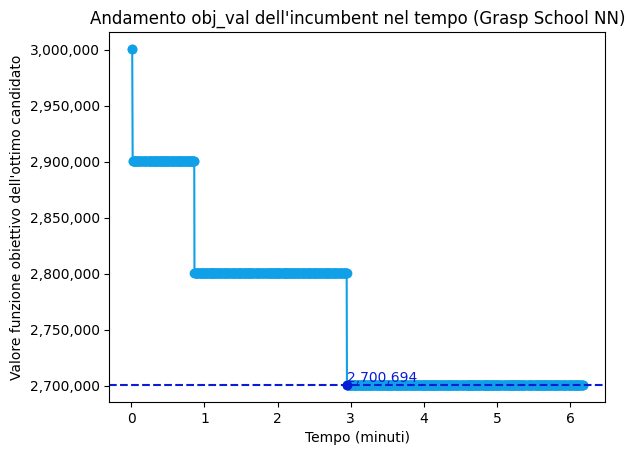

Tempo impiegato: 00:06:10.538433
Funzione obiettivo: 2700694
Soluzione ammissibile.


In [42]:
(percorsi_G_sch_bI, G_sch_bI_obj_val, residui_dict_small_G_sch_NN_bI), time = GRASP_School_NN(G_small, residui_dict_small, delta_small, k=2, num_greedy=1000, ls="local_search_bI", max_len=5, img="images/small/grasp_sch_bI_time.png")
#stampa_percorsi(percorsi_G_sch_bI)
print(f"Funzione obiettivo: {G_sch_bI_obj_val}")
check_solution(percorsi_G_sch_bI, G_small, delta_small)
grasp_schoolNN.append(G_sch_bI_obj_val)
grasp_bI.append(G_sch_bI_obj_val)
times_small.append(time)

1
Tempo impiegato: 00:00:0.007280
Tempo impiegato: 00:00:0.253482
2
Tempo impiegato: 00:00:0.007041
Tempo impiegato: 00:00:0.314815
3
Tempo impiegato: 00:00:0.007150
Tempo impiegato: 00:00:0.444127
4
Tempo impiegato: 00:00:0.006959
Tempo impiegato: 00:00:0.430145
5
Tempo impiegato: 00:00:0.007047
Tempo impiegato: 00:00:0.499248
6
Tempo impiegato: 00:00:0.006886
Tempo impiegato: 00:00:0.159306
7
Tempo impiegato: 00:00:0.006486
Tempo impiegato: 00:00:0.174781
8
Tempo impiegato: 00:00:0.007042
Tempo impiegato: 00:00:0.268631
9
Tempo impiegato: 00:00:0.006936
Tempo impiegato: 00:00:0.214798
10
Tempo impiegato: 00:00:0.007119
Tempo impiegato: 00:00:0.172611
11
Tempo impiegato: 00:00:0.006628
Tempo impiegato: 00:00:0.325718
12
Tempo impiegato: 00:00:0.006683
Tempo impiegato: 00:00:0.443071
13
Tempo impiegato: 00:00:0.007006
Tempo impiegato: 00:00:0.790503
14
Tempo impiegato: 00:00:0.007003
Tempo impiegato: 00:00:0.441505
15
Tempo impiegato: 00:00:0.006869
Tempo impiegato: 00:00:0.262457
16
T

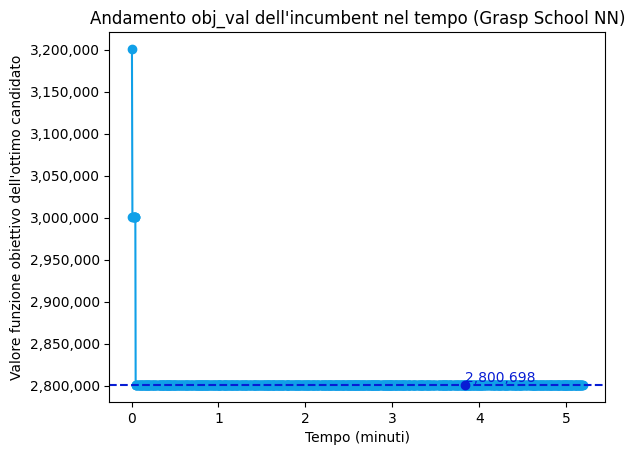

Tempo impiegato: 00:05:11.606430
Funzione obiettivo: 2800698
Soluzione ammissibile.


In [43]:
(percorsi_G_sch_fI, G_sch_fI_obj_val, residui_dict_small_G_sch_NN_fI), time = GRASP_School_NN(G_small, residui_dict_small, delta_small, k=2, num_greedy=1000, ls="local_search_fI", max_len=5, img="images/small/grasp_sch_fI_time.png")
#stampa_percorsi(percorsi_G_sch_fI)
print(f"Funzione obiettivo: {G_sch_fI_obj_val}")
check_solution(percorsi_G_sch_fI, G_small, delta_small)
grasp_schoolNN.append(G_sch_fI_obj_val)
grasp_fI.append(G_sch_fI_obj_val)
times_small.append(time)

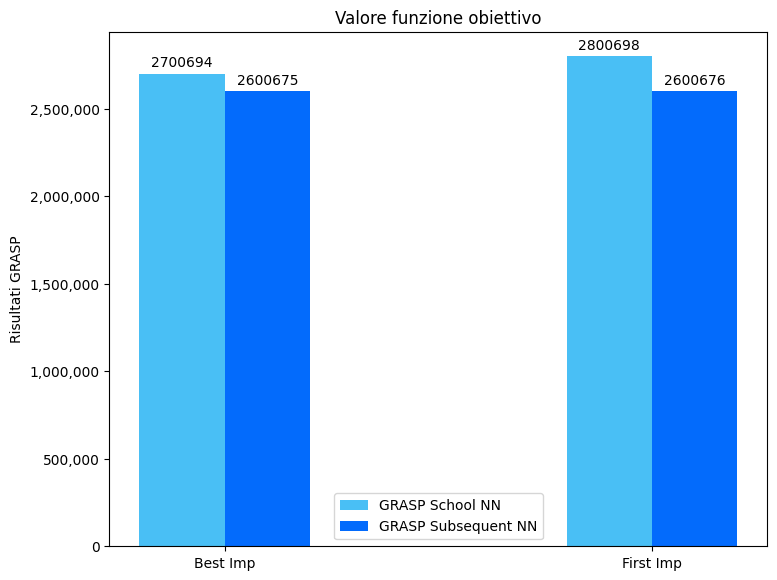

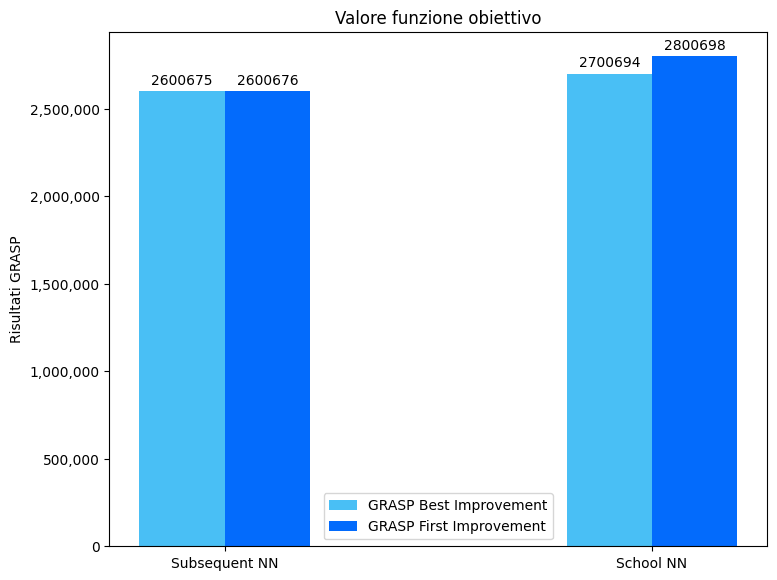

In [44]:
plotSubSchResults(grasp_subsequentNN, grasp_schoolNN, 'GRASP', img + 'grasp_small_sub_sch.png')
plotBestFirstResults(grasp_bI, grasp_fI, 'GRASP', img + 'grasp_small_best_first.png')

# Tabu Search small

Iterazione: 0, Non migliorato: 0, Current OV: 2800677, Best OV: 2800677
Iterazione: 1, Non migliorato: 0, Current OV: 2800675, Best OV: 2800675
Iterazione: 2, Non migliorato: 0, Current OV: 2800674, Best OV: 2800674
Iterazione: 3, Non migliorato: 0, Current OV: 2800673, Best OV: 2800673
Iterazione: 4, Non migliorato: 1, Current OV: 2800673, Best OV: 2800673
Iterazione: 5, Non migliorato: 2, Current OV: 2800673, Best OV: 2800673
Iterazione: 6, Non migliorato: 3, Current OV: 2800673, Best OV: 2800673
Iterazione: 7, Non migliorato: 4, Current OV: 2800673, Best OV: 2800673
Iterazione: 8, Non migliorato: 5, Current OV: 2800673, Best OV: 2800673
Iterazione: 9, Non migliorato: 6, Current OV: 2800673, Best OV: 2800673
Iterazione: 10, Non migliorato: 7, Current OV: 2800673, Best OV: 2800673
Iterazione: 11, Non migliorato: 8, Current OV: 2800693, Best OV: 2800673
Iterazione: 12, Non migliorato: 9, Current OV: 2800690, Best OV: 2800673
Iterazione: 13, Non migliorato: 10, Current OV: 2800688, Best

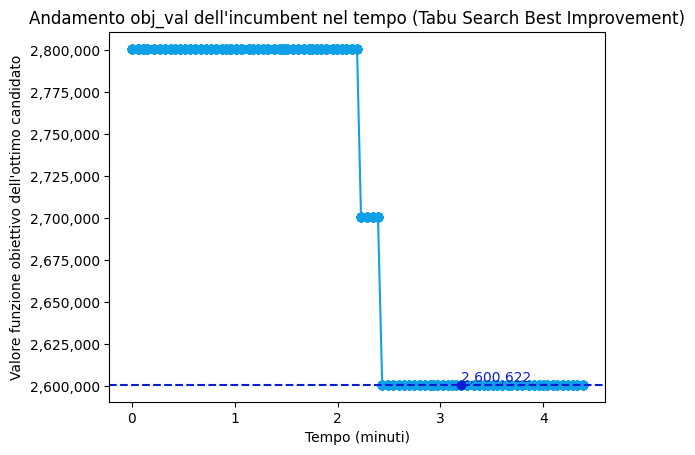

Tempo impiegato: 00:04:23.133562
Funzione obiettivo: 2600622
Soluzione ammissibile.


In [45]:

(percorsi_tabu_sub, tabu_sub_obj_val, residui_dict_small_tabu_sub), time = tabu_search_bI(G_small, residui_dict_small_sub_NN, percorsi_sub_NN, sub_NN_obj_val, delta_small, max_len=5, img="images/small/tabu_sub_bI_time.png")
#stampa_percorsi(percorsi_sub_NN)
print(f"Funzione obiettivo: {tabu_sub_obj_val}")
check_solution(percorsi_tabu_sub, G_small, delta_small)
tabu_subsequentNN.append(tabu_sub_obj_val)
tabu_bI.append(tabu_sub_obj_val)   
times_small.append(time)

Iterazione: 0, Non migliorato: 0, Current OV: 2800677, Best OV: 2800677
Iterazione: 1, Non migliorato: 0, Current OV: 2800676, Best OV: 2800676
Iterazione: 2, Non migliorato: 0, Current OV: 2800675, Best OV: 2800675
Iterazione: 3, Non migliorato: 0, Current OV: 2800674, Best OV: 2800674
Iterazione: 4, Non migliorato: 0, Current OV: 2800673, Best OV: 2800673
Iterazione: 5, Non migliorato: 1, Current OV: 2800673, Best OV: 2800673
Iterazione: 6, Non migliorato: 2, Current OV: 2800673, Best OV: 2800673
Iterazione: 7, Non migliorato: 3, Current OV: 2800673, Best OV: 2800673
Iterazione: 8, Non migliorato: 4, Current OV: 2800673, Best OV: 2800673
Iterazione: 9, Non migliorato: 5, Current OV: 2800673, Best OV: 2800673
Iterazione: 10, Non migliorato: 6, Current OV: 2800673, Best OV: 2800673
Iterazione: 11, Non migliorato: 7, Current OV: 2800692, Best OV: 2800673
Iterazione: 12, Non migliorato: 8, Current OV: 2800691, Best OV: 2800673
Iterazione: 13, Non migliorato: 9, Current OV: 2800690, Best 

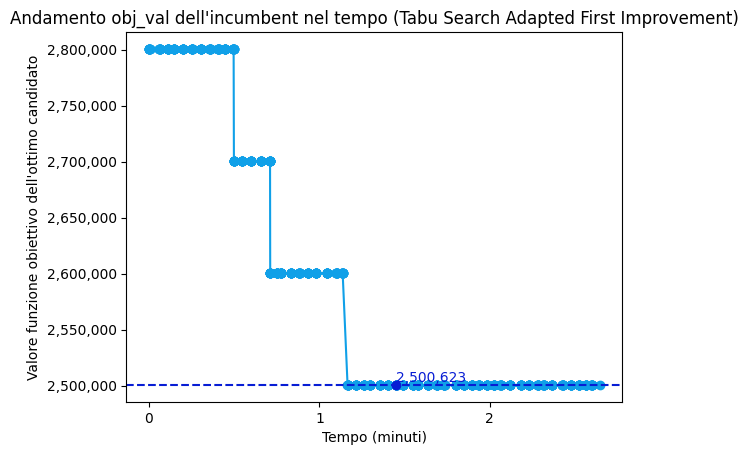

Tempo impiegato: 00:02:38.795813
Funzione obiettivo: 2500623
Soluzione ammissibile.


In [46]:

(percorsi_tabu_sub, tabu_sub_obj_val, residui_dict_small_tabu_sub), time = tabu_search_fI(G_small, residui_dict_small_sub_NN, percorsi_sub_NN, sub_NN_obj_val, delta_small, max_len=5, img="images/small/tabu_sub_fI_time.png")
#stampa_percorsi(percorsi_sub_NN)
print(f"Funzione obiettivo: {tabu_sub_obj_val}")
check_solution(percorsi_tabu_sub, G_small, delta_small)
tabu_subsequentNN.append(tabu_sub_obj_val)
tabu_fI.append(tabu_sub_obj_val)
times_small.append(time)

Iterazione: 0, Non migliorato: 0, Current OV: 2800703, Best OV: 2800703
Iterazione: 1, Non migliorato: 0, Current OV: 2800701, Best OV: 2800701
Iterazione: 2, Non migliorato: 0, Current OV: 2800700, Best OV: 2800700
Iterazione: 3, Non migliorato: 0, Current OV: 2800699, Best OV: 2800699
Iterazione: 4, Non migliorato: 0, Current OV: 2800698, Best OV: 2800698
Iterazione: 5, Non migliorato: 0, Current OV: 2800697, Best OV: 2800697
Iterazione: 6, Non migliorato: 1, Current OV: 2800697, Best OV: 2800697
Iterazione: 7, Non migliorato: 2, Current OV: 2800697, Best OV: 2800697
Iterazione: 8, Non migliorato: 3, Current OV: 2800697, Best OV: 2800697
Iterazione: 9, Non migliorato: 4, Current OV: 2800697, Best OV: 2800697
Iterazione: 10, Non migliorato: 5, Current OV: 2800697, Best OV: 2800697
Iterazione: 11, Non migliorato: 6, Current OV: 2800701, Best OV: 2800697
Iterazione: 12, Non migliorato: 7, Current OV: 2800699, Best OV: 2800697
Iterazione: 13, Non migliorato: 8, Current OV: 2800699, Best 

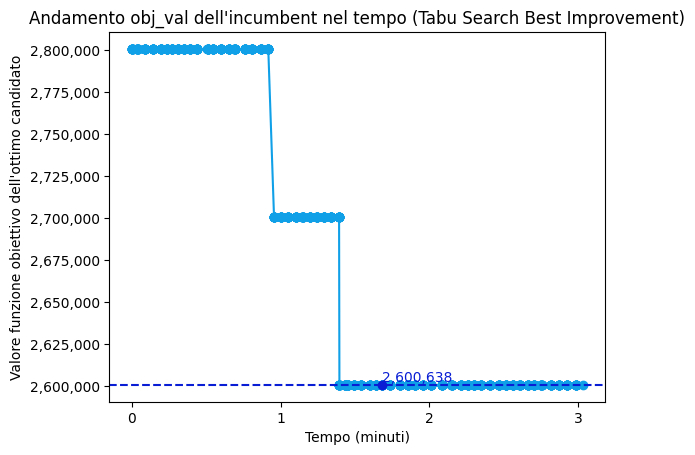

Tempo impiegato: 00:03:1.925928
Funzione obiettivo: 2600638
Soluzione ammissibile.


In [47]:
(percorsi_tabu_sch, tabu_sch_obj_val, residui_dict_small_tabu_sch), time = tabu_search_bI(G_small, residui_dict_small_sch_NN, percorsi_sch_NN, sch_NN_obj_val, delta_small, max_len=5, img="images/small/tabu_sch_bI_time.png")
#stampa_percorsi(percorsi_sub_NN)
print(f"Funzione obiettivo: {tabu_sch_obj_val}")
check_solution(percorsi_tabu_sch, G_small, delta_small)
tabu_schoolNN.append(tabu_sch_obj_val)
tabu_bI.append(tabu_sch_obj_val)
times_small.append(time)

Iterazione: 0, Non migliorato: 0, Current OV: 2800703, Best OV: 2800703
Iterazione: 1, Non migliorato: 0, Current OV: 2800702, Best OV: 2800702
Iterazione: 2, Non migliorato: 0, Current OV: 2800701, Best OV: 2800701
Iterazione: 3, Non migliorato: 0, Current OV: 2800700, Best OV: 2800700
Iterazione: 4, Non migliorato: 0, Current OV: 2800699, Best OV: 2800699
Iterazione: 5, Non migliorato: 0, Current OV: 2800697, Best OV: 2800697
Iterazione: 6, Non migliorato: 1, Current OV: 2800697, Best OV: 2800697
Iterazione: 7, Non migliorato: 2, Current OV: 2800697, Best OV: 2800697
Iterazione: 8, Non migliorato: 3, Current OV: 2800697, Best OV: 2800697
Iterazione: 9, Non migliorato: 4, Current OV: 2800697, Best OV: 2800697
Iterazione: 10, Non migliorato: 5, Current OV: 2800697, Best OV: 2800697
Iterazione: 11, Non migliorato: 6, Current OV: 2800699, Best OV: 2800697
Iterazione: 12, Non migliorato: 7, Current OV: 2800698, Best OV: 2800697
Iterazione: 13, Non migliorato: 0, Current OV: 2800694, Best 

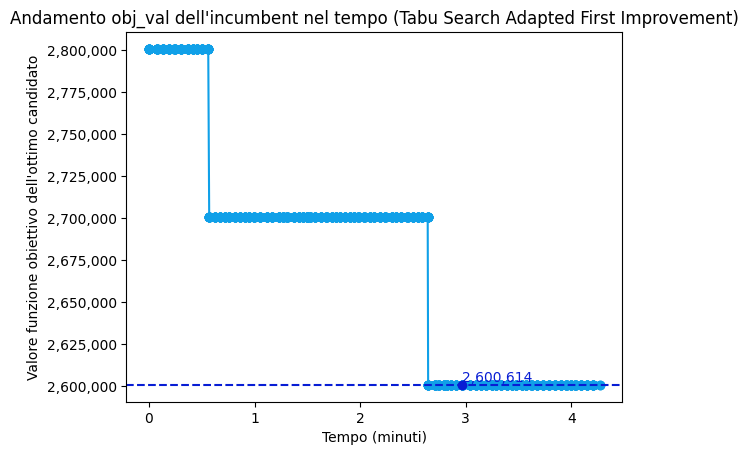

Tempo impiegato: 00:04:16.278901
Funzione obiettivo: 2600614
Soluzione ammissibile.


In [48]:
(percorsi_tabu_sch, tabu_sch_obj_val, residui_dict_small_tabu_sch), time = tabu_search_fI(G_small, residui_dict_small_sch_NN, percorsi_sch_NN, sch_NN_obj_val, delta_small, max_len=5, img="images/small/tabu_sch_fI_time.png")
#stampa_percorsi(percorsi_sub_NN)
print(f"Funzione obiettivo: {tabu_sch_obj_val}")
check_solution(percorsi_tabu_sch, G_small, delta_small)
tabu_schoolNN.append(tabu_sch_obj_val)
tabu_fI.append(tabu_sch_obj_val)
times_small.append(time)

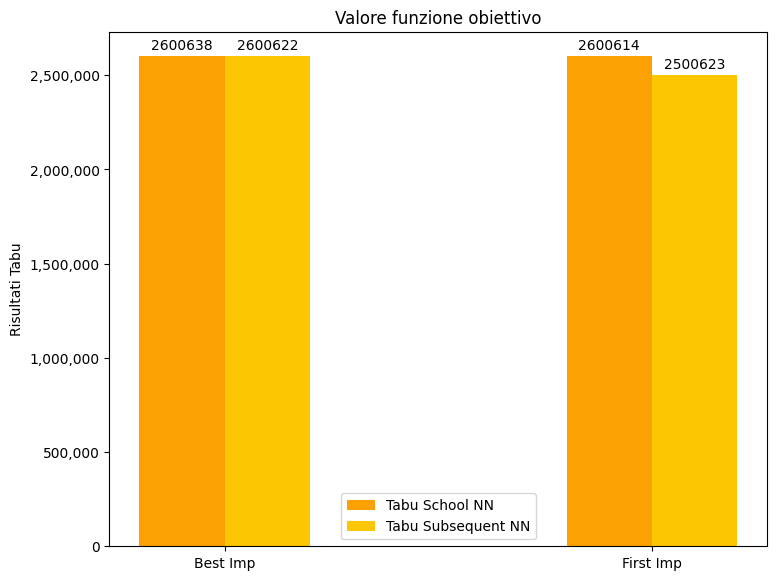

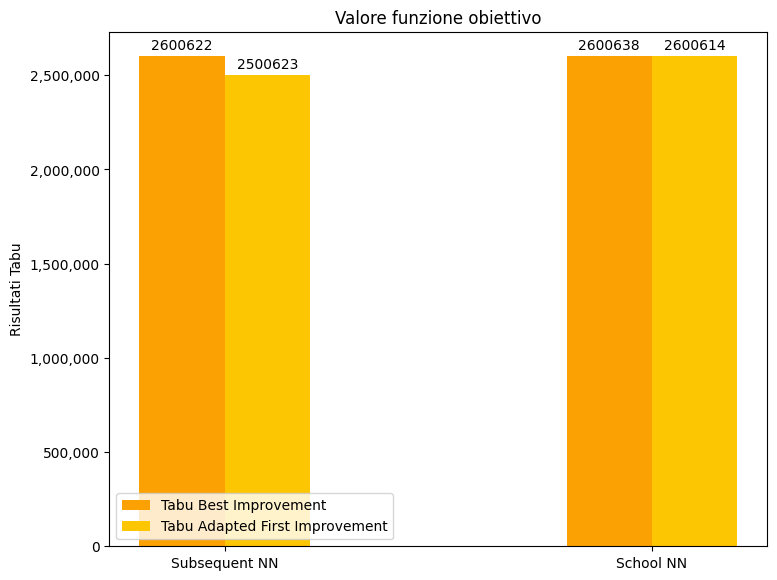

In [49]:
plotSubSchResults(tabu_subsequentNN, tabu_schoolNN, 'Tabu' , img + 'tabu_search_small_sub_sch.png')
plotBestFirstResults(tabu_bI, tabu_fI, 'Tabu', img + 'tabu_search_small_best_first.png')

# Iterated Search small

Tempo impiegato: 00:00:0.144851
Temperatura: 160, Current OV: 2800677, Best OV: 2800677
Tempo impiegato: 00:00:0.277561
Temperatura: 160, ls OV: 2600663, Best OV: 2800677
Temperatura: 160, Current OV: 2600663, Best OV: 2600663
Tempo impiegato: 00:00:0.071663
Temperatura: 160, ls OV: 2600662, Best OV: 2600663
Temperatura: 160, Current OV: 2600662, Best OV: 2600662
Tempo impiegato: 00:00:0.047403
Temperatura: 160, ls OV: 2600657, Best OV: 2600662
Temperatura: 160, Current OV: 2600657, Best OV: 2600657
Tempo impiegato: 00:00:0.056058
Temperatura: 160, ls OV: 2600657, Best OV: 2600657
r : 0.30861907896879637 soglia:  1.0
Temperatura: 160, Current OV: 2600657, Best OV: 2600657
Tempo impiegato: 00:00:0.091334
Temperatura: 160, ls OV: 2600658, Best OV: 2600657
r : 0.14644400457317952 soglia:  0.9937694906233947
Temperatura: 160, Current OV: 2600658, Best OV: 2600657
Tempo impiegato: 00:00:0.081100
Temperatura: 160, ls OV: 2600658, Best OV: 2600657
r : 0.46679825434384015 soglia:  1.0
Temperat

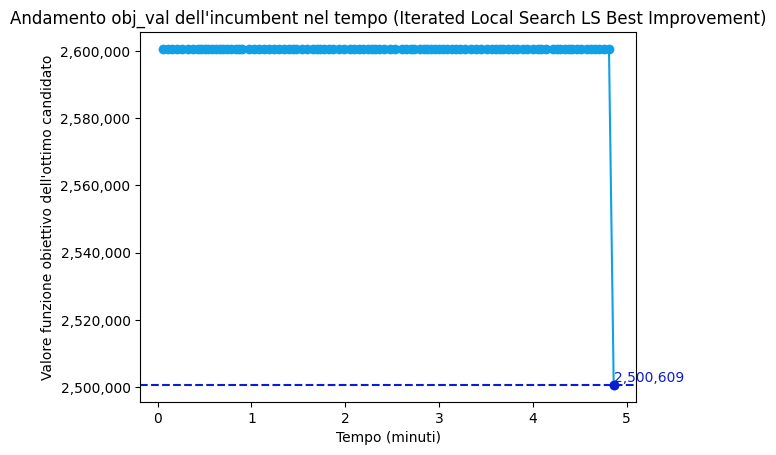

Tempo impiegato: 00:04:51.879430
Funzione obiettivo: 2500609
Soluzione ammissibile.


In [50]:

(percorsi_ILS_sub_bI, ILS_sub_bI_obj_val, residui_dict_small_ILS_sub_bI), time = iterated_local_search(G_small, residui_dict_small_sub_NN, percorsi_sub_NN, sub_NN_obj_val, delta_small, max_len=5, ls="local_search_bI", img="images/small/ils_sub_bI_time.png")
#stampa_percorsi(percorsi_sub_NN)
print(f"Funzione obiettivo: {ILS_sub_bI_obj_val}")
check_solution(percorsi_ILS_sub_bI, G_small, delta_small)
Ils_subsequentNN.append(ILS_sub_bI_obj_val)
ils_bI.append(ILS_sub_bI_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.121003
Temperatura: 160, Current OV: 2800677, Best OV: 2800677
Tempo impiegato: 00:00:0.086388
Temperatura: 160, ls OV: 2800686, Best OV: 2800677
r : 0.5542111157894101 soglia:  0.9453027806520595
Temperatura: 160, Current OV: 2800686, Best OV: 2800677
Tempo impiegato: 00:00:0.056790
Temperatura: 160, ls OV: 2800683, Best OV: 2800677
Temperatura: 160, Current OV: 2800683, Best OV: 2800677
Tempo impiegato: 00:00:0.103872
Temperatura: 160, ls OV: 2800678, Best OV: 2800677
Temperatura: 160, Current OV: 2800678, Best OV: 2800677
Tempo impiegato: 00:00:0.132106
Temperatura: 160, ls OV: 2700673, Best OV: 2800677
Temperatura: 160, Current OV: 2700673, Best OV: 2700673
Tempo impiegato: 00:00:0.100204
Temperatura: 160, ls OV: 2700671, Best OV: 2700673
Temperatura: 160, Current OV: 2700671, Best OV: 2700671
Tempo impiegato: 00:00:0.069451
Temperatura: 160, ls OV: 2700680, Best OV: 2700671
r : 0.5678074934825343 soglia:  0.9453027806520595
Temperatura: 160, Current OV: 27

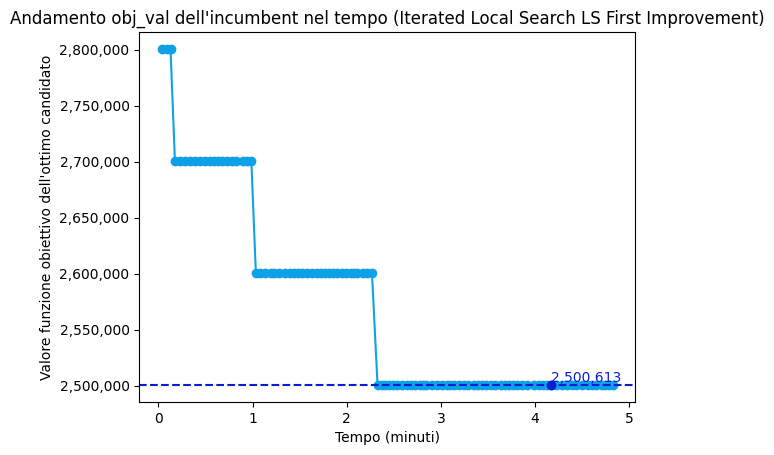

Tempo impiegato: 00:04:49.614789
Funzione obiettivo: 2500613
Soluzione ammissibile.


In [51]:
(percorsi_ILS_sub_fI, ILS_sub_fI_obj_val, residui_dict_small_ILS_sub_fI), time = iterated_local_search(G_small, residui_dict_small_sub_NN, percorsi_sub_NN, sub_NN_obj_val, delta_small, max_len=5, ls="local_search_fI", img="images/small/ils_sub_fI_time.png")
#stampa_percorsi(percorsi_sub_NN)
print(f"Funzione obiettivo: {ILS_sub_fI_obj_val}")
check_solution(percorsi_ILS_sub_fI, G_small, delta_small)
Ils_subsequentNN.append(ILS_sub_fI_obj_val)
ils_fI.append(ILS_sub_fI_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.148706
Temperatura: 160, Current OV: 2800703, Best OV: 2800703
Tempo impiegato: 00:00:0.188622
Temperatura: 160, ls OV: 2700679, Best OV: 2800703
Temperatura: 160, Current OV: 2700679, Best OV: 2700679
Tempo impiegato: 00:00:0.091814
Temperatura: 160, ls OV: 2700686, Best OV: 2700679
r : 0.3668250388530727 soglia:  0.9571932258697183
Temperatura: 160, Current OV: 2700686, Best OV: 2700679
Tempo impiegato: 00:00:0.065909
Temperatura: 160, ls OV: 2700682, Best OV: 2700679
Temperatura: 160, Current OV: 2700682, Best OV: 2700679
Tempo impiegato: 00:00:0.089822
Temperatura: 160, ls OV: 2700681, Best OV: 2700679
Temperatura: 160, Current OV: 2700681, Best OV: 2700679
Tempo impiegato: 00:00:0.055162
Temperatura: 160, ls OV: 2700675, Best OV: 2700679
Temperatura: 160, Current OV: 2700675, Best OV: 2700675
Tempo impiegato: 00:00:0.089178
Temperatura: 160, ls OV: 2700672, Best OV: 2700675
Temperatura: 160, Current OV: 2700672, Best OV: 2700672
Tempo impiegato: 00:00:0.10

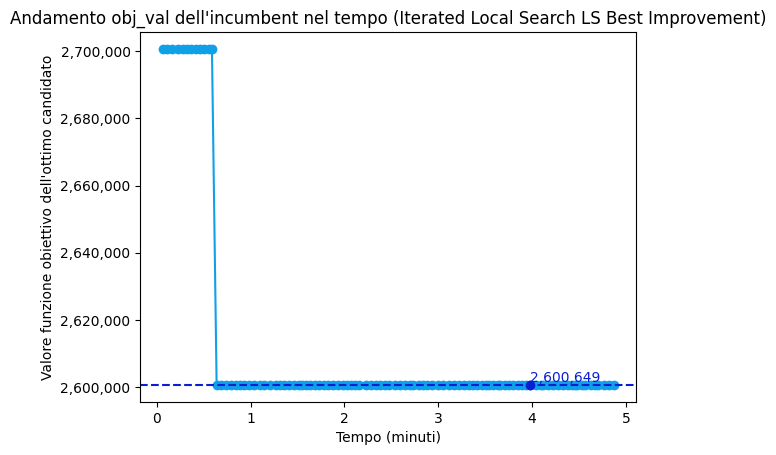

Tempo impiegato: 00:04:52.298997
Funzione obiettivo: 2600649
Soluzione ammissibile.


In [52]:
(percorsi_ILS_sch_bI, ILS_sch_bI_obj_val, residui_dict_small_ILS_sch_bI), time = iterated_local_search(G_small, residui_dict_small_sch_NN, percorsi_sch_NN, sch_NN_obj_val, delta_small, max_len=5, ls="local_search_bI", img="images/small/ils_sch_bI_time.png")
#stampa_percorsi(percorsi_sub_NN)
print(f"Funzione obiettivo: {ILS_sch_bI_obj_val}")
check_solution(percorsi_ILS_sch_bI, G_small, delta_small)
Ils_schoolNN.append(ILS_sch_bI_obj_val)
ils_bI.append(ILS_sch_bI_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.110813
Temperatura: 160, Current OV: 2800703, Best OV: 2800703
Tempo impiegato: 00:00:0.082382
Temperatura: 160, ls OV: 2800701, Best OV: 2800703
Temperatura: 160, Current OV: 2800701, Best OV: 2800701
Tempo impiegato: 00:00:0.088073
Temperatura: 160, ls OV: 2800703, Best OV: 2800701
r : 0.2572702975485597 soglia:  0.9875778004938814
Temperatura: 160, Current OV: 2800703, Best OV: 2800701
Tempo impiegato: 00:00:0.087337
Temperatura: 160, ls OV: 2800714, Best OV: 2800701
r : 0.5062108108554652 soglia:  0.933560040917111
Temperatura: 160, Current OV: 2800714, Best OV: 2800701
Tempo impiegato: 00:00:0.056511
Temperatura: 160, ls OV: 2800703, Best OV: 2800701
Temperatura: 160, Current OV: 2800703, Best OV: 2800701
Tempo impiegato: 00:00:0.058548
Temperatura: 160, ls OV: 2800706, Best OV: 2800701
r : 0.85186606263625 soglia:  0.9814246877477771
Temperatura: 160, Current OV: 2800706, Best OV: 2800701
Tempo impiegato: 00:00:0.109641
Temperatura: 160, ls OV: 2800694, B

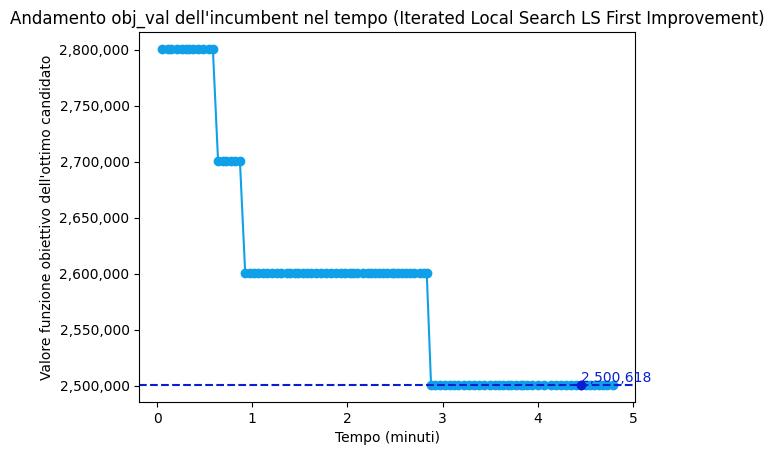

Tempo impiegato: 00:04:47.452152
Funzione obiettivo: 2500618
Soluzione ammissibile.


In [53]:
(percorsi_ILS_sch_fI, ILS_sch_fI_obj_val, residui_dict_small_ILS_sch_fI), time = iterated_local_search(G_small, residui_dict_small_sch_NN, percorsi_sch_NN, sch_NN_obj_val, delta_small, max_len=5, ls="local_search_fI", img="images/small/ils_sch_fI_time.png")
#stampa_percorsi(percorsi_sub_NN)
print(f"Funzione obiettivo: {ILS_sch_fI_obj_val}")
check_solution(percorsi_ILS_sch_fI, G_small, delta_small)
Ils_schoolNN.append(ILS_sch_fI_obj_val)
ils_fI.append(ILS_sch_fI_obj_val)
times_small.append(time)

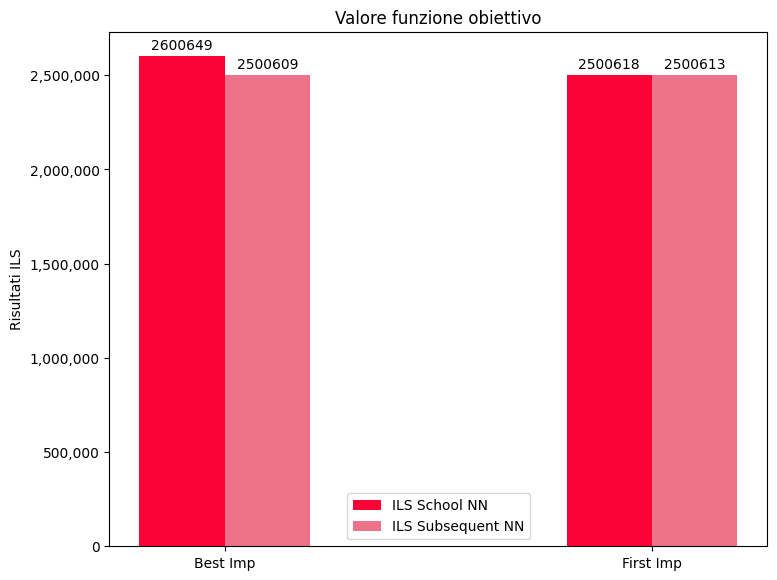

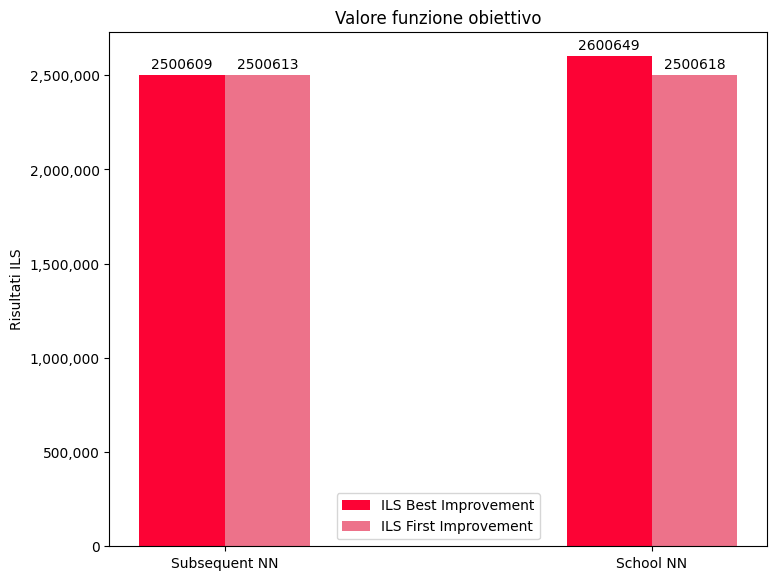

In [54]:
plotSubSchResults(Ils_subsequentNN, Ils_schoolNN, 'ILS', img + 'ils_small_sub_sch.png')

plotBestFirstResults(ils_bI, ils_fI, 'ILS', img + 'ils_small_best_first.png')

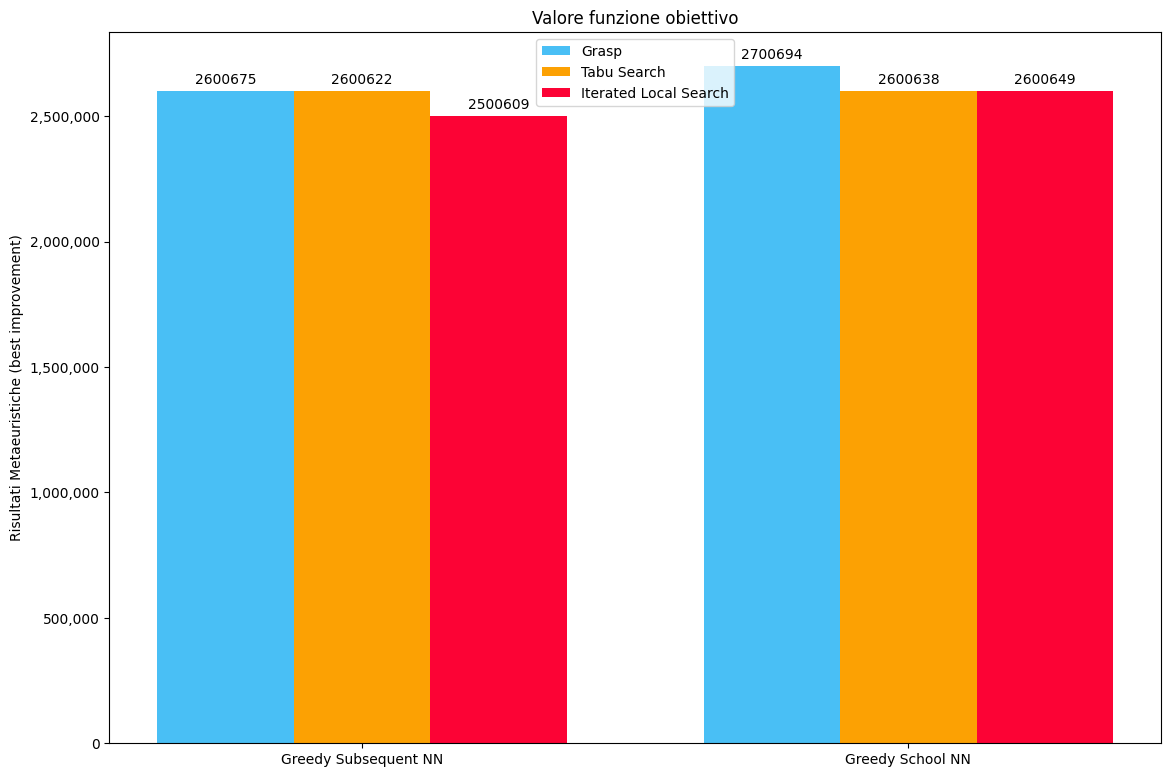

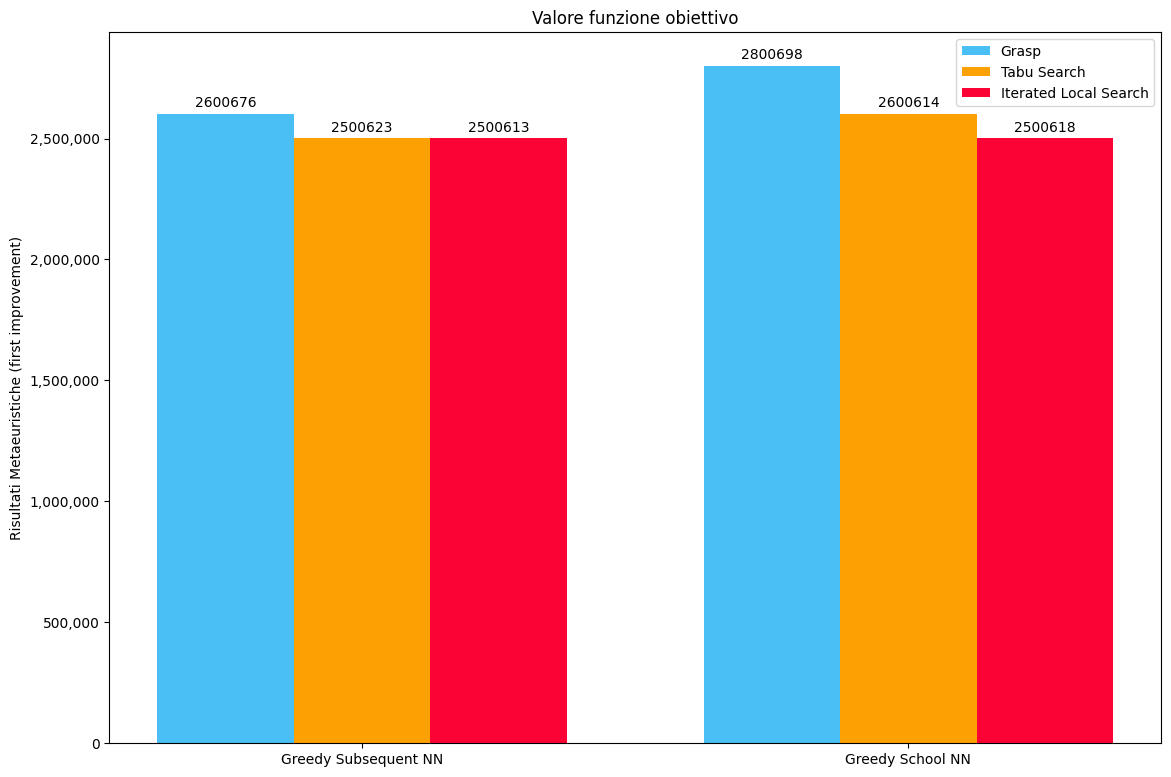

In [55]:
plotMetaheuristicsResults(grasp_bI, tabu_bI, ils_bI, img +'metaheuristics_bI_small.png')
plotMetaheuristicsResults(grasp_fI, tabu_fI, ils_fI, img +'metaheuristics_fI_small.png', bestImp=False)

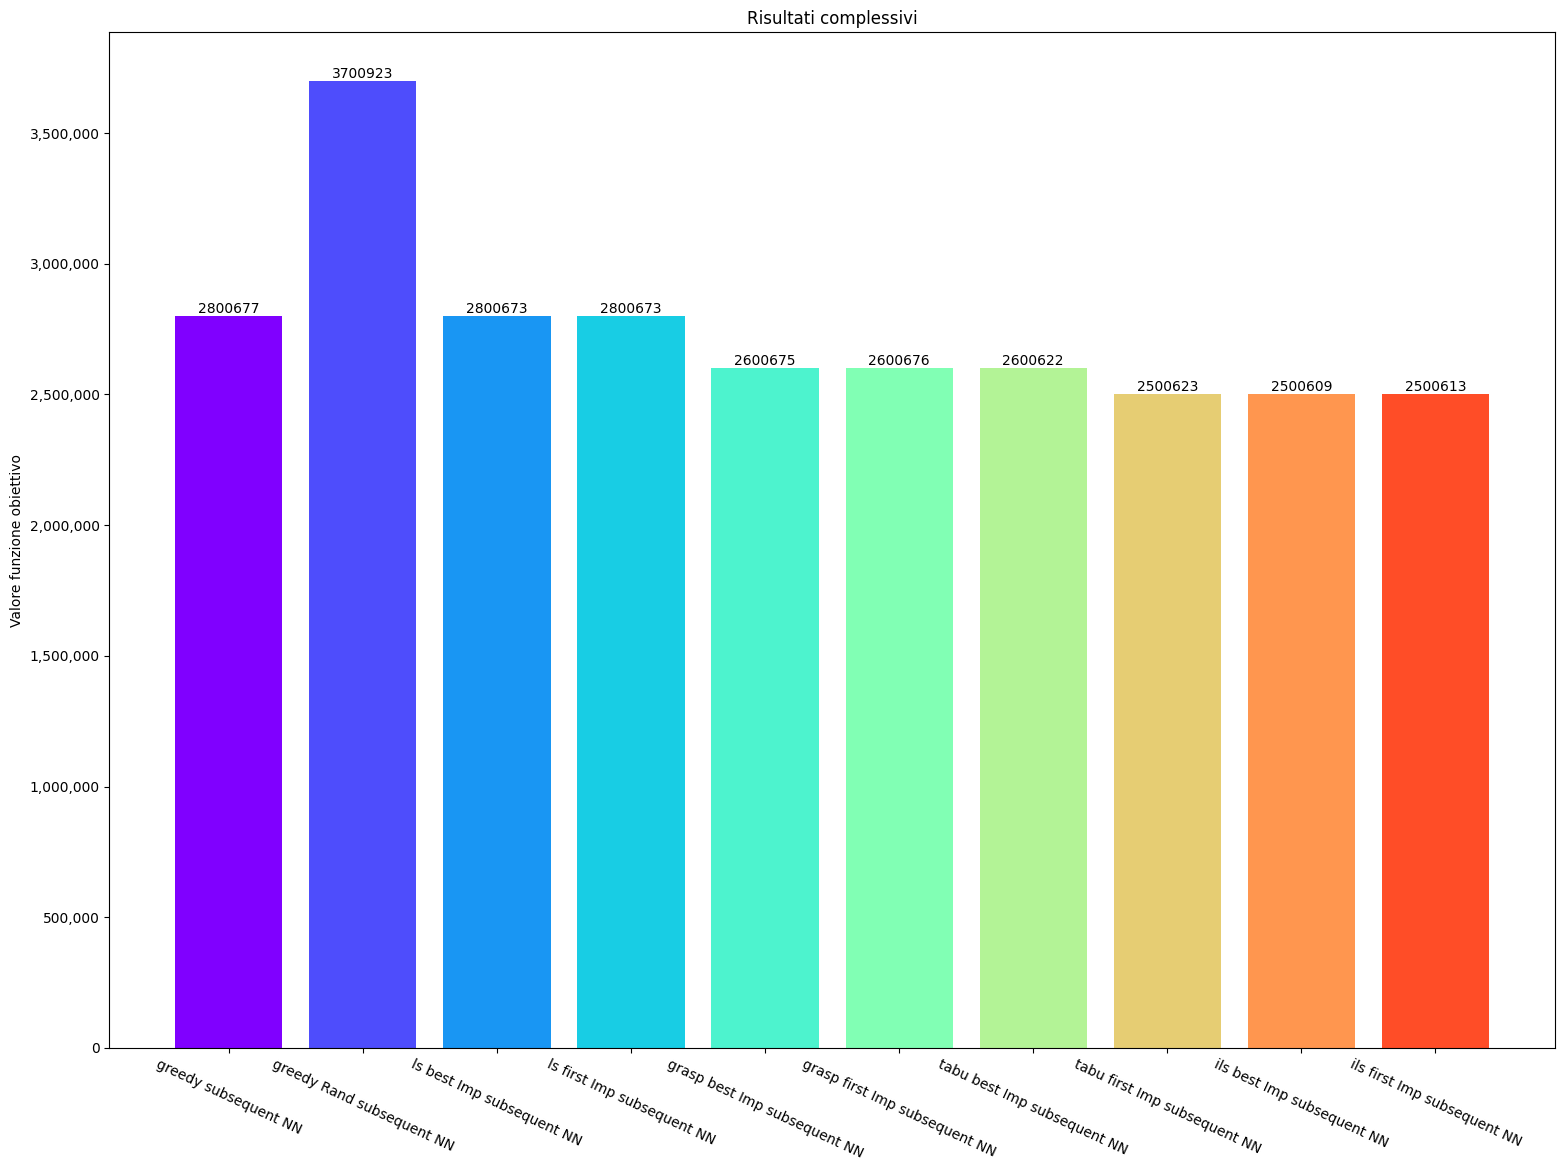

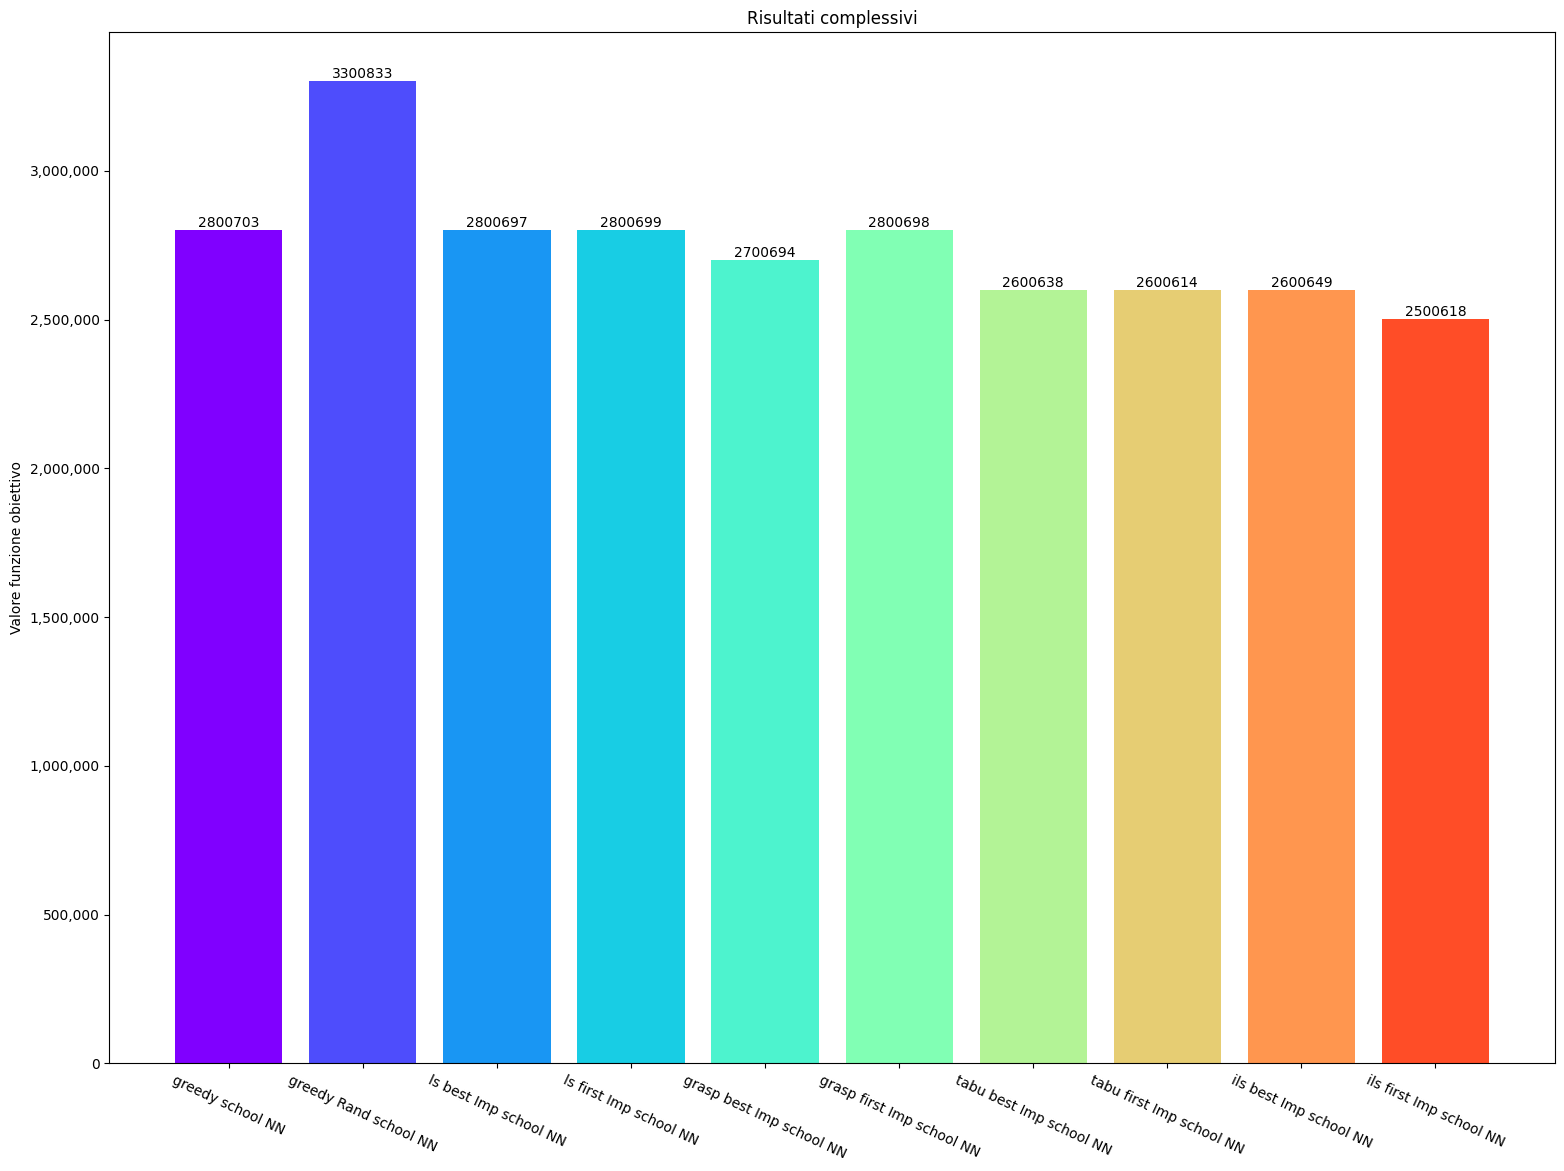

In [56]:
subsequent_results = []
school_results = []

subsequent_results.extend(subsequentNN)
subsequent_results.extend(ls_subsequentNN)
subsequent_results.extend(grasp_subsequentNN)
subsequent_results.extend(tabu_subsequentNN)
subsequent_results.extend(Ils_subsequentNN)

school_results.extend(schoolNN)
school_results.extend(ls_schoolNN)
school_results.extend(grasp_schoolNN)
school_results.extend(tabu_schoolNN)
school_results.extend(Ils_schoolNN)

plot_greedy_based_results(subsequent_results, img + 'subsequent_results_small.png', 'SubsequentNN')
plot_greedy_based_results(school_results,  img + 'school_results_small.png', 'SchoolNN')

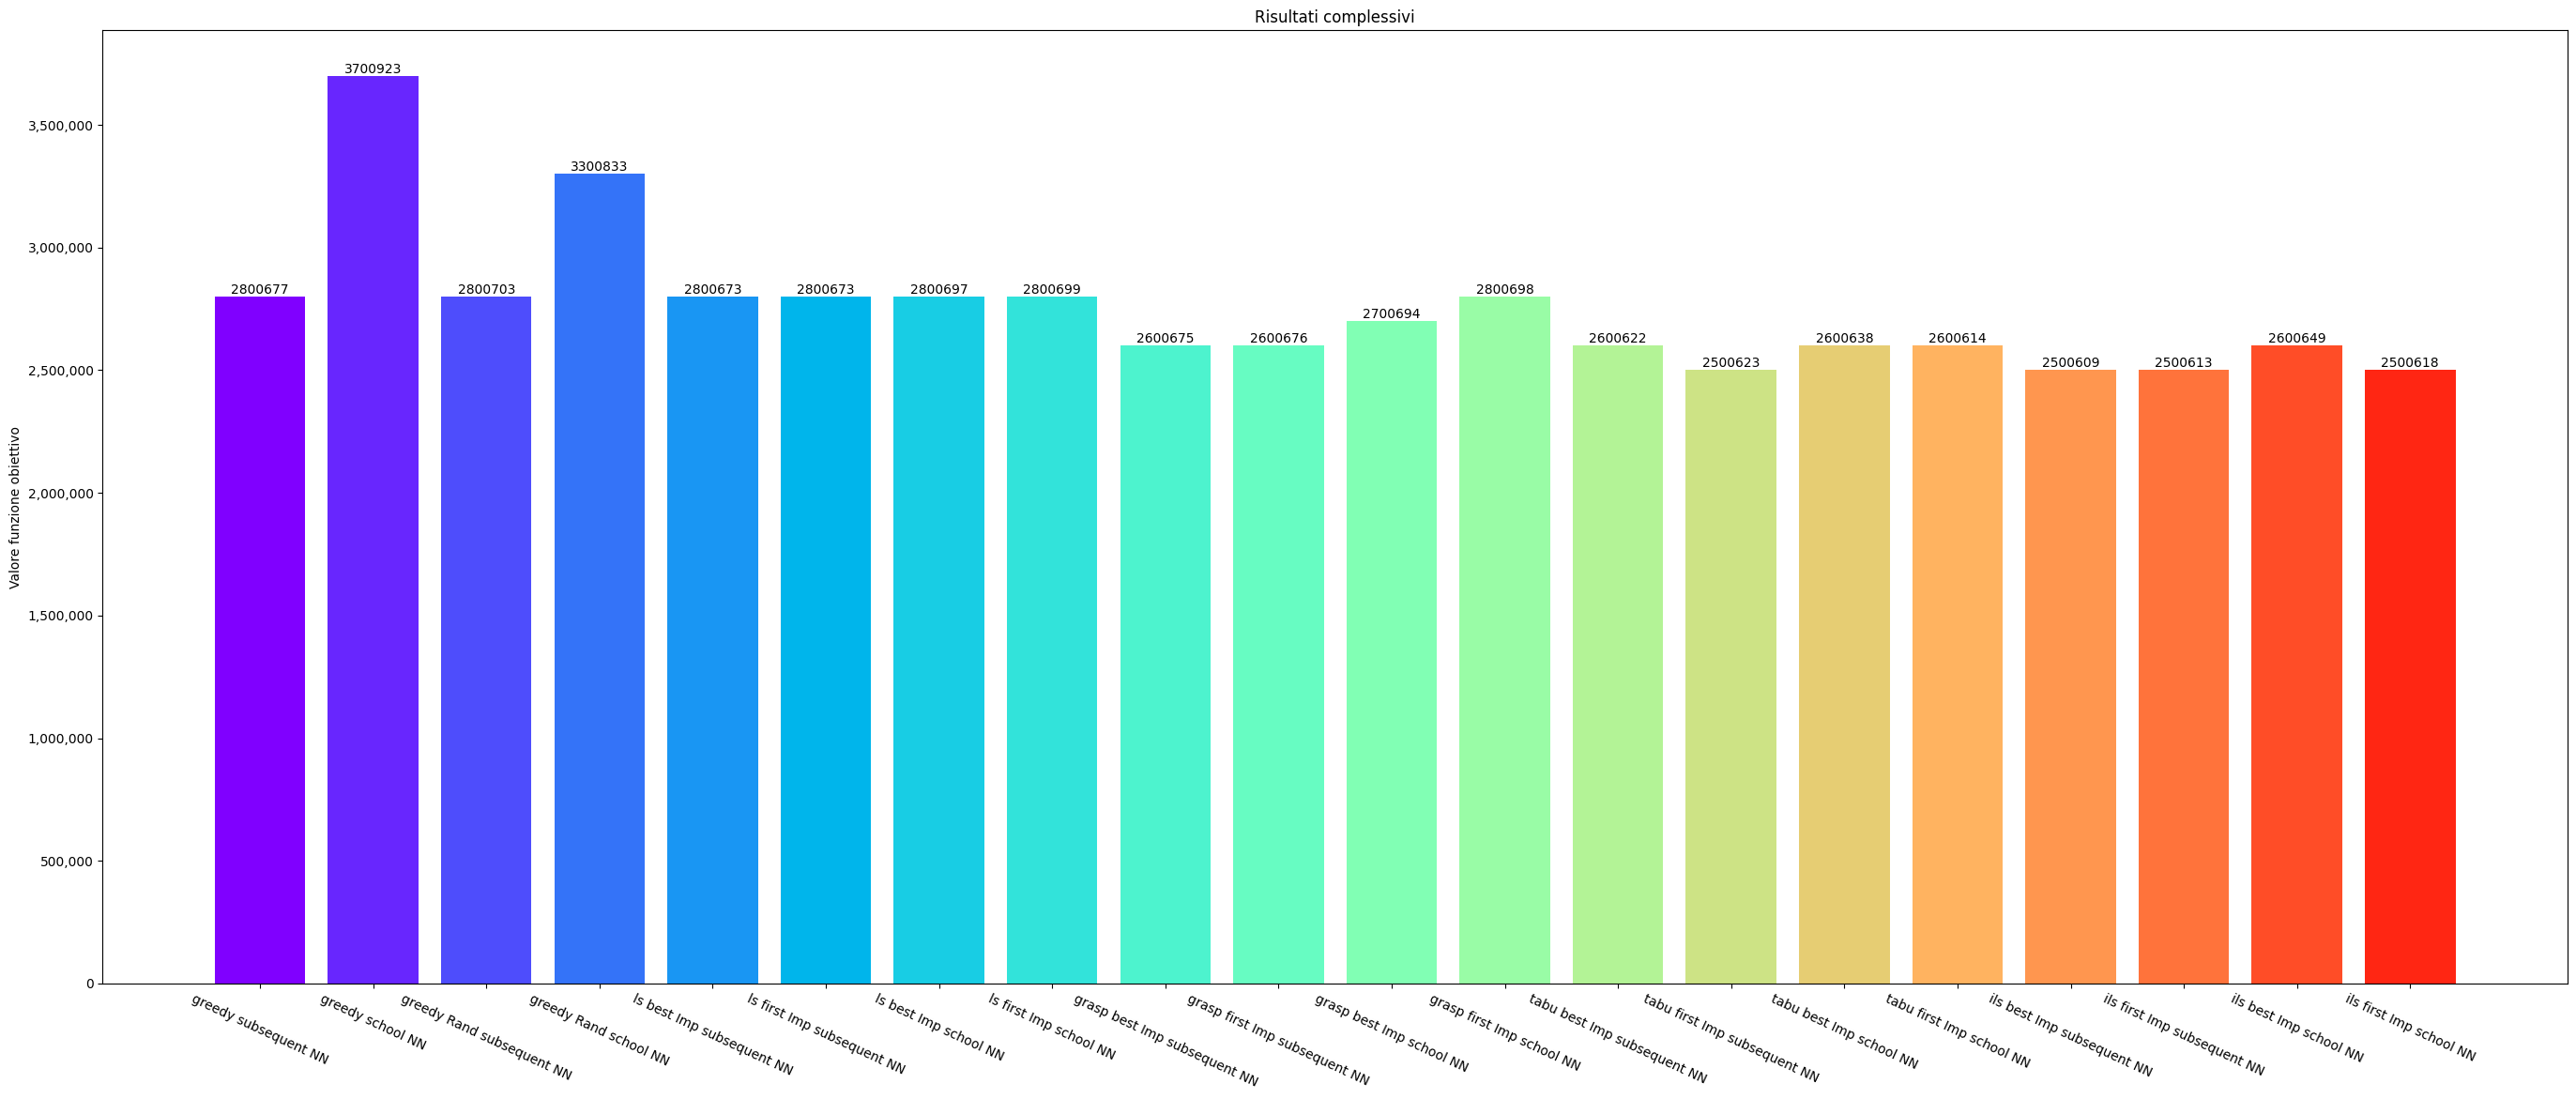

In [57]:
results = []
results.extend(subsequentNN)
results.extend(schoolNN)
results.extend(ls_subsequentNN)
results.extend(ls_schoolNN)
results.extend(grasp_subsequentNN)
results.extend(grasp_schoolNN)
results.extend(tabu_subsequentNN)
results.extend(tabu_schoolNN)
results.extend(Ils_subsequentNN)
results.extend(Ils_schoolNN)



plot_all_results(results, img + 'all_small.png')

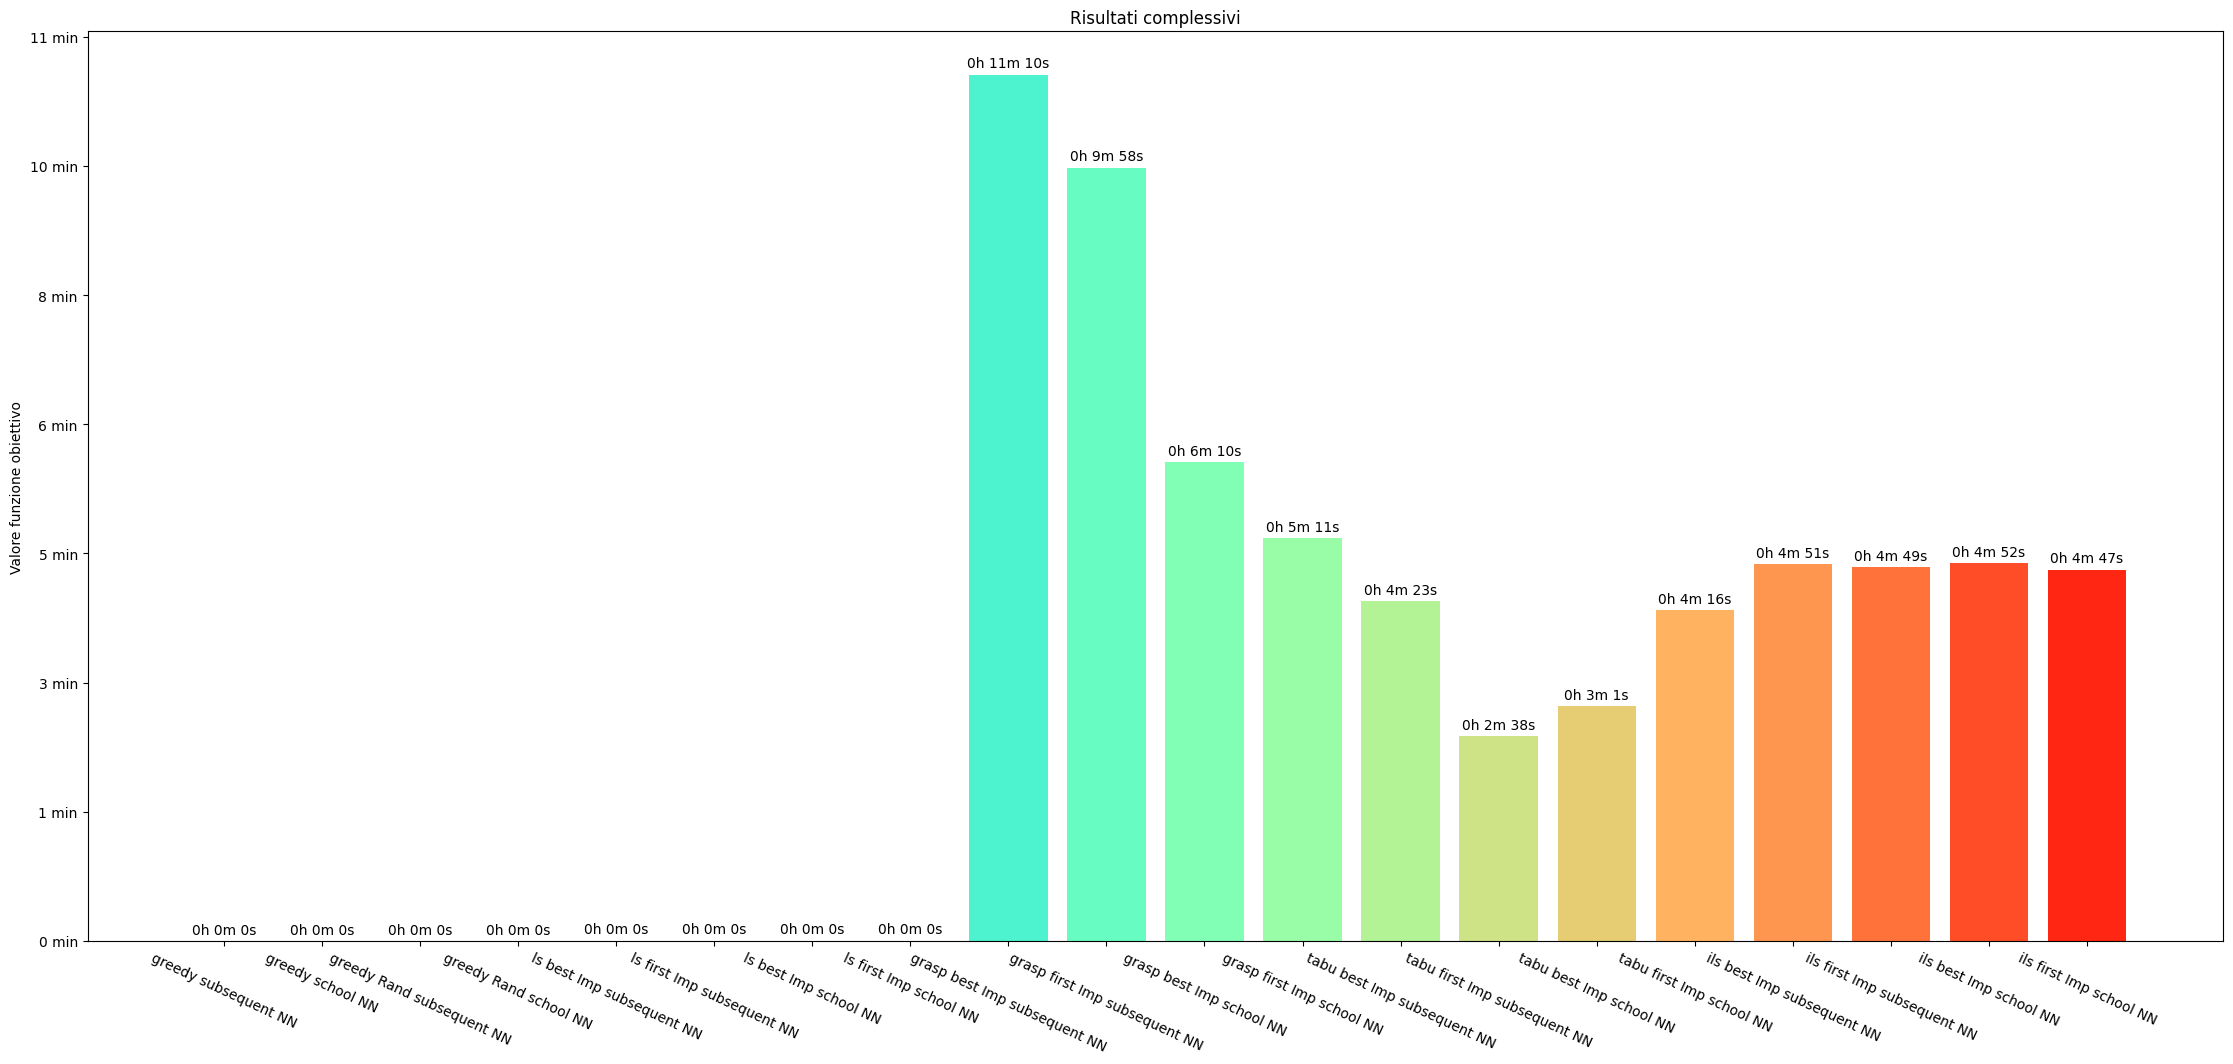

In [58]:
plot_time_results(times_small, img + 'times_small.png')

# Clark and Wright

Tempo impiegato: 00:01:3.413235
### Visualizzazione dei Percorsi ###

Percorso 1: Scuola - Bambino_4 - Bambino_18
Percorso 2: Scuola - Bambino_6 - Bambino_108
Percorso 3: Scuola - Bambino_59 - Bambino_119
Percorso 4: Scuola - Bambino_72 - Bambino_197
Percorso 5: Scuola - Bambino_122 - Bambino_159
Percorso 6: Scuola - Bambino_20 - Bambino_50
Percorso 7: Scuola - Bambino_86 - Bambino_97
Percorso 8: Scuola - Bambino_169 - Bambino_173
Percorso 9: Scuola - Bambino_2 - Bambino_25 - Bambino_87 - Bambino_118 - Bambino_10 - Bambino_189 - Bambino_22 - Bambino_184 - Bambino_65 - Bambino_110
Percorso 10: Scuola - Bambino_44 - Bambino_162
Percorso 11: Scuola - Bambino_200 - Bambino_103 - Bambino_101 - Bambino_176 - Bambino_40 - Bambino_148
Percorso 12: Scuola - Bambino_146 - Bambino_182
Percorso 13: Scuola - Bambino_74 - Bambino_24 - Bambino_164 - Bambino_60 - Bambino_179
Percorso 14: Scuola - Bambino_147 - Bambino_193
Percorso 15: Scuola - Bambino_161 - Bambino_89 - Bambino_53 - Bambino_100 - Bamb

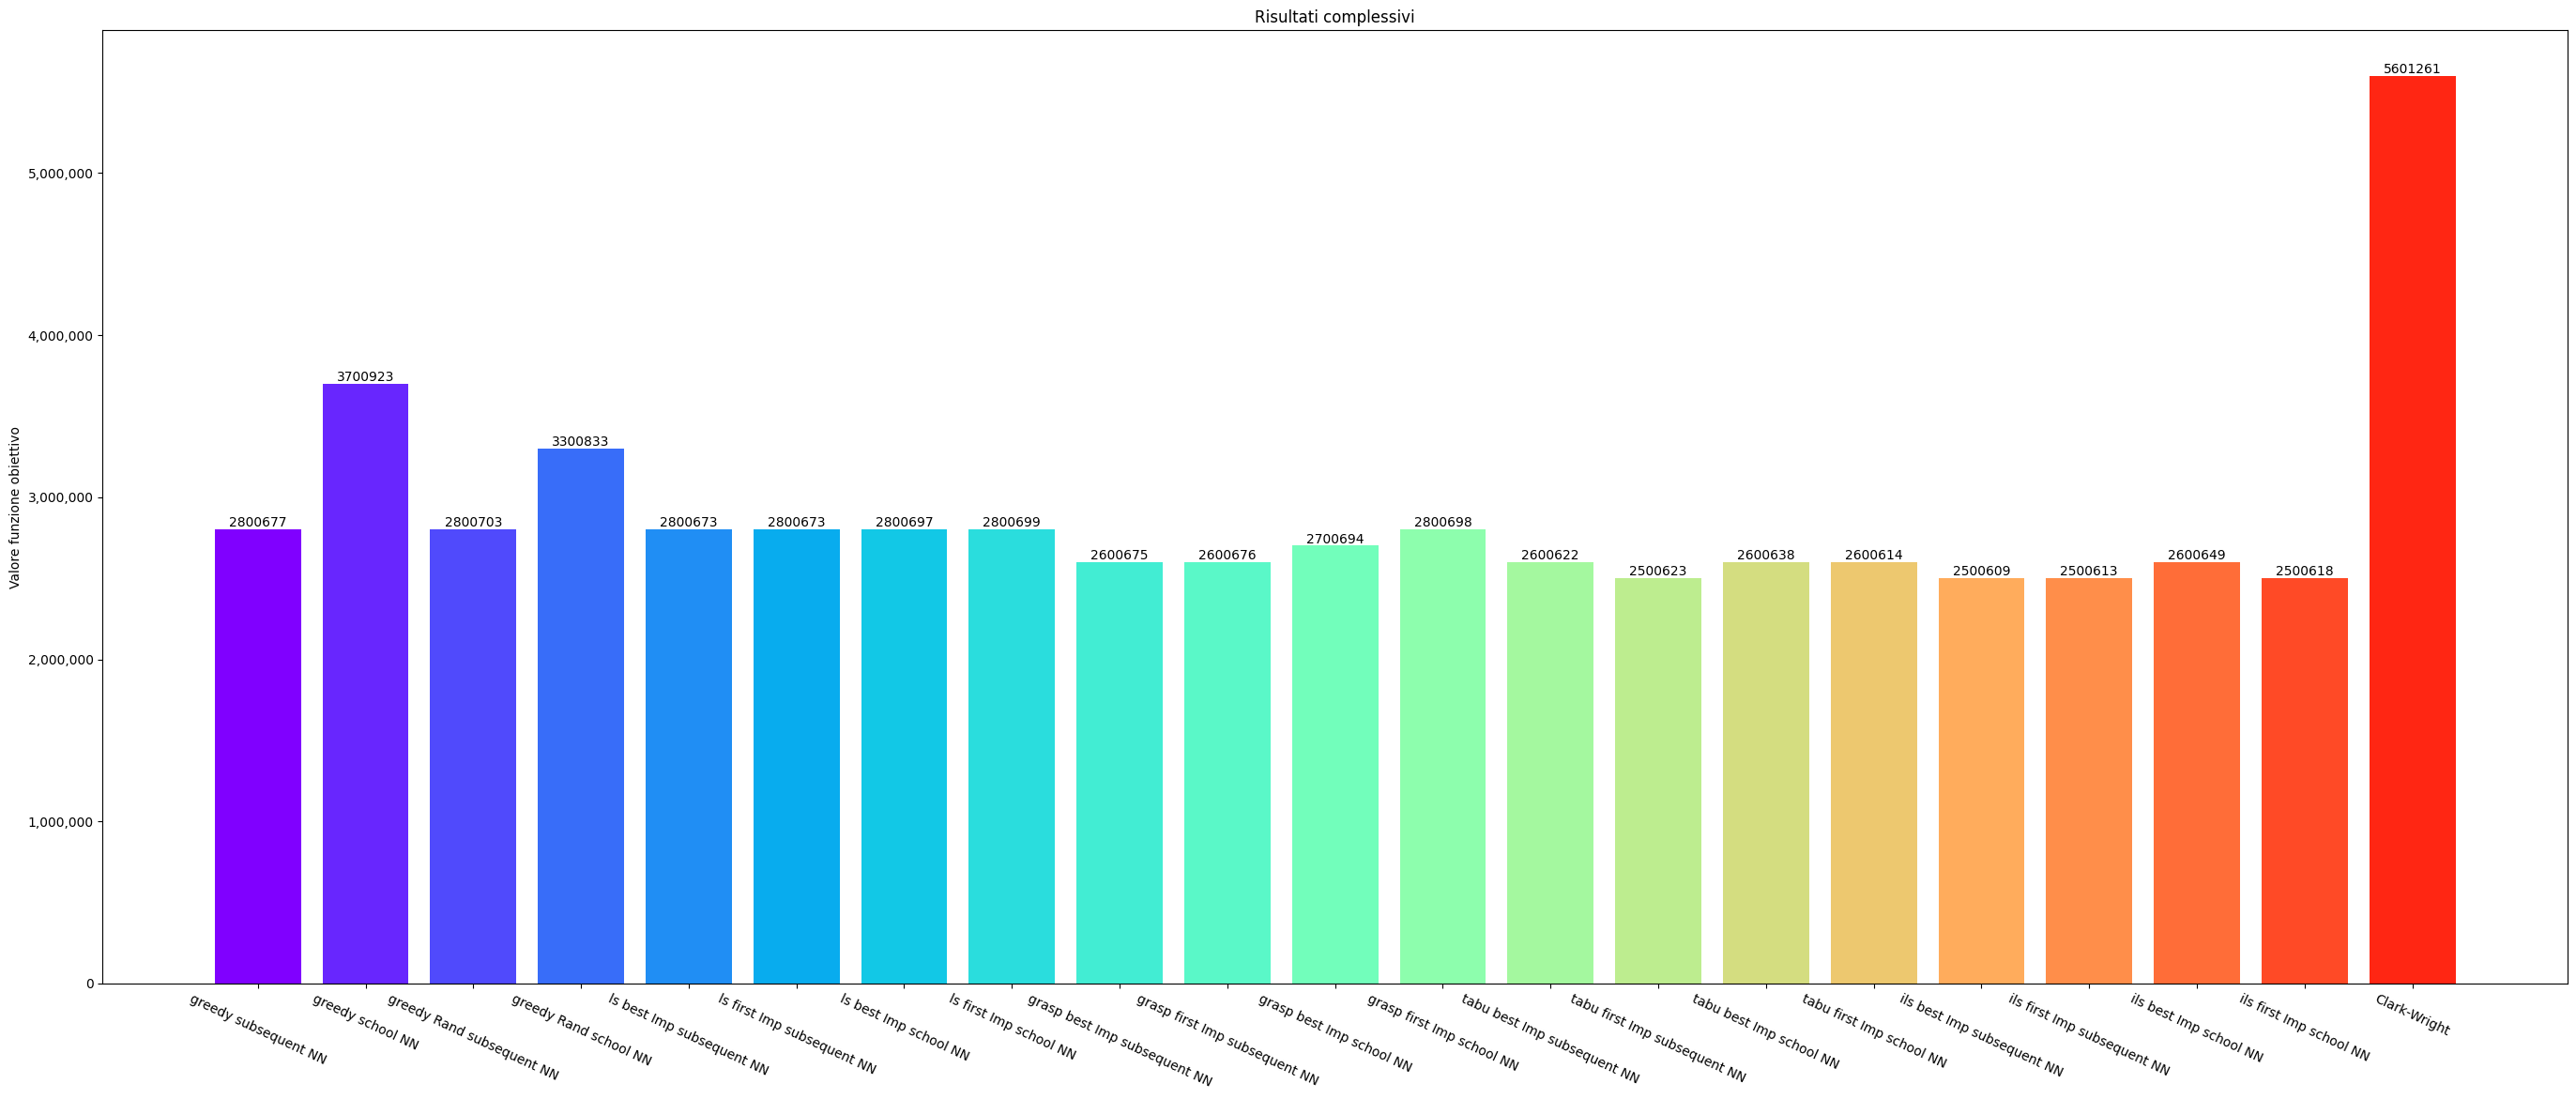

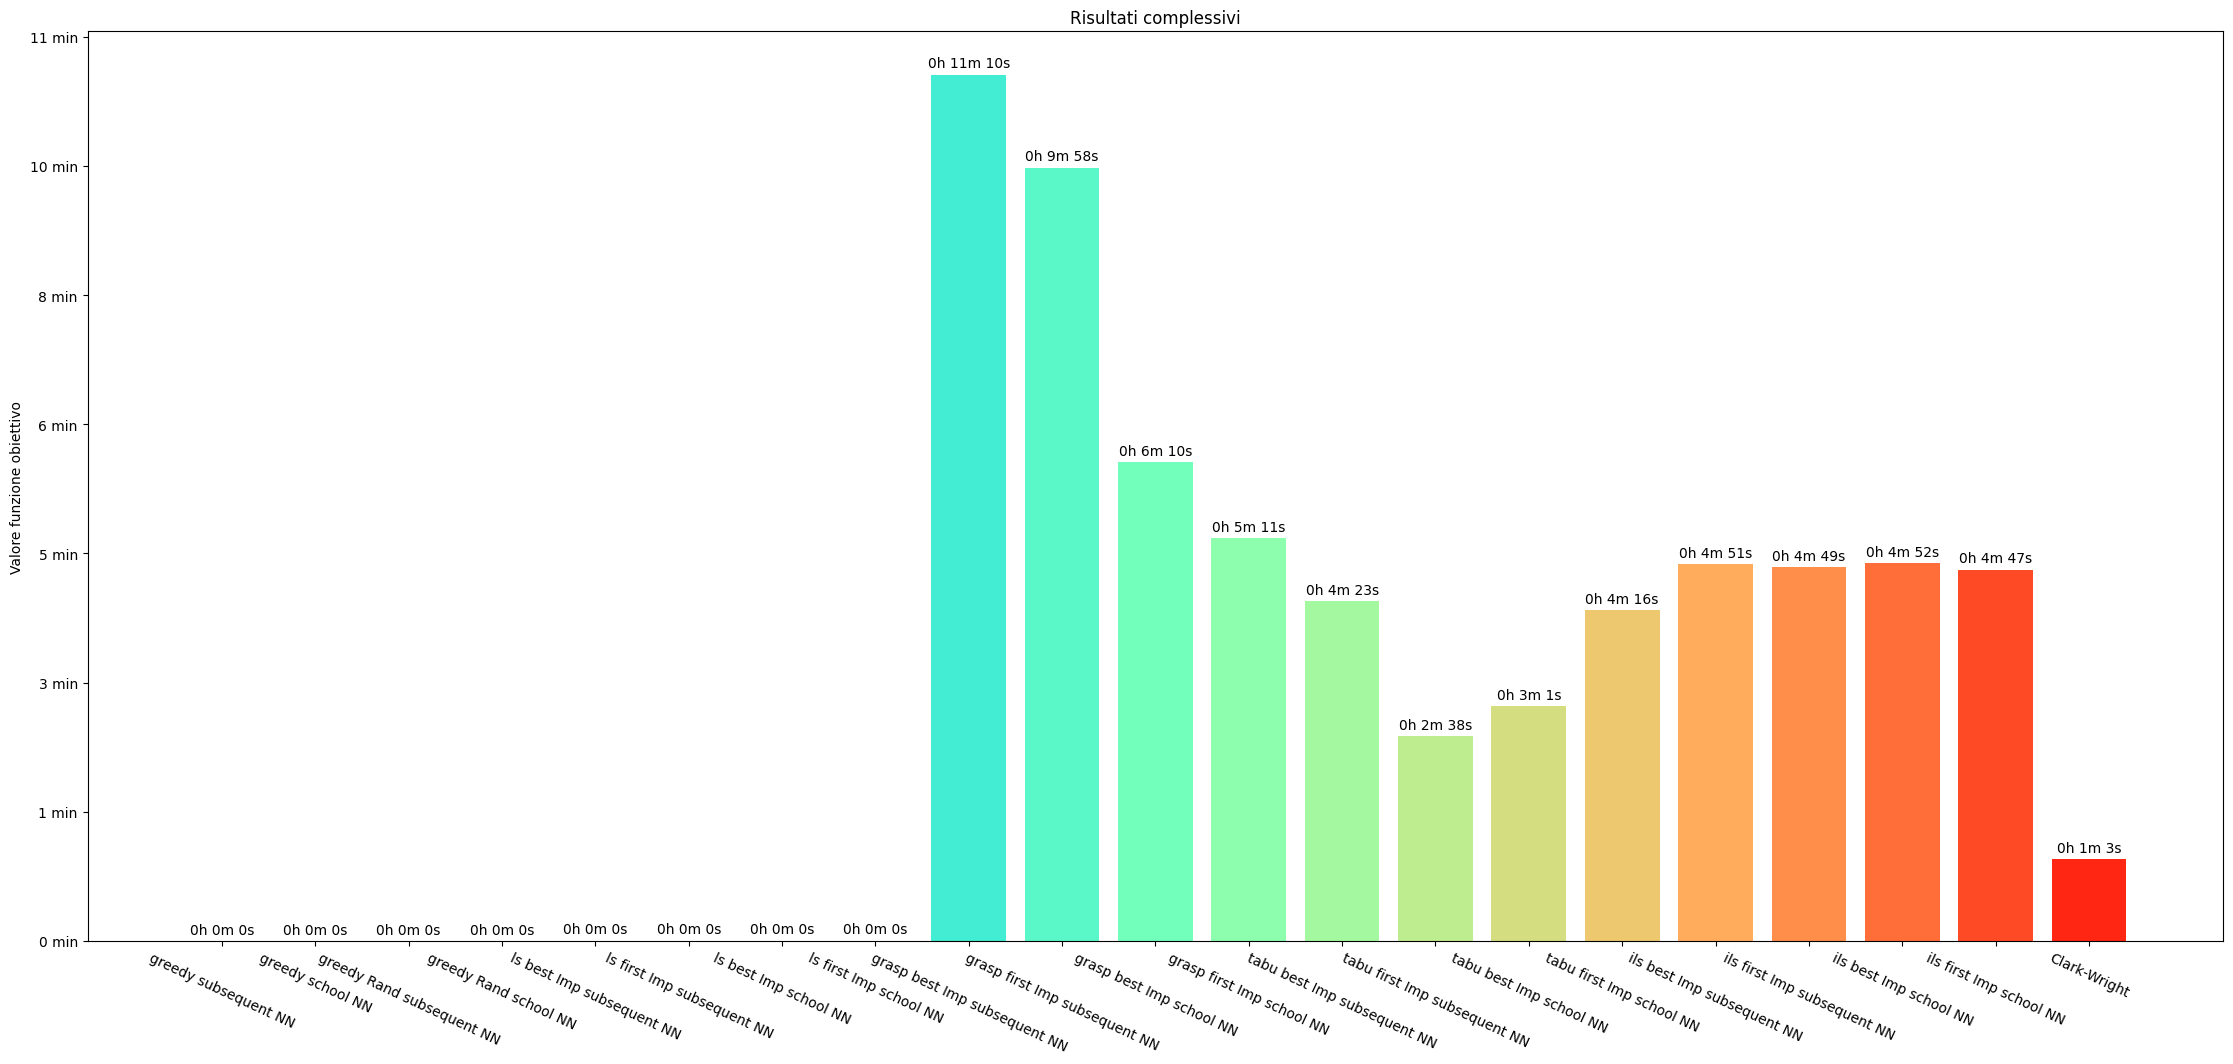

In [59]:
(percorsi_cw, cw_obj_val, residui_dict_small_cw), time = clark_wright(G_small, residui_dict_small, delta_small)
stampa_percorsi(percorsi_cw)
print(f"Funzione obiettivo: {cw_obj_val}")
check_solution(percorsi_cw, G_small, delta_small)

results.append(cw_obj_val)
times_small.append(time)

plot_all_results(results, img + 'all_small_cw.png', cw=True)
plot_time_results(times_small, img + 'all_times_small_cw.png', cw=True)